**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. DATA

**Load Data**

In [2]:
# Specifies the path and reads the CSV file
file_path = 'healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Convert to Lower Case**

The "Residence_type" column has its first character uppercase. Change the column name to lowercase to make the dataset more consistent.

In [3]:
data.rename(columns={'Residence_type': 'residence_type'}, inplace = True)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Some data columns have uppercase values, since there is no need to use uppercase in this case I will convert them all to lowercase. This will reduce the possibility of miscalculation. For example, "Urban" and "UrBaN" will be considered different values, even though they actually mean the same thing.

In [4]:
column_list = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

for col in column_list:
    data[col] = data[col].str.lower()

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly smoked,1
1,51676,female,61.0,0,0,yes,self-employed,rural,202.21,NaN,never smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.5,never smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never smoked,1


**Unique Values**

In [5]:
# Prints the unique values in each specified column
print("Unique 'gender': {}".format(data['gender'].unique()))
print("Unique 'ever_married': {}".format(data['ever_married'].unique()))
print("Unique 'work_type': {}".format(data['work_type'].unique()))
print("Unique 'residence_type': {}".format(data['residence_type'].unique()))
print("Unique 'smoking_status': {}".format(data['smoking_status'].unique()))

Unique 'gender': ['male' 'female' 'other']
Unique 'ever_married': ['yes' 'no']
Unique 'work_type': ['private' 'self-employed' 'govt_job' 'children' 'never_worked']
Unique 'residence_type': ['urban' 'rural']
Unique 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'unknown']


**Convert 'age' to Integer**

In [6]:
# Converts the 'age' column to integer type because the age has no decimal places
data['age'] = data['age'].astype(int)

In [7]:
data.head(10)     # Displays the first 10 rows of the dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67,0,1,yes,private,urban,228.69,36.6,formerly smoked,1
1,51676,female,61,0,0,yes,self-employed,rural,202.21,NaN,never smoked,1
2,31112,male,80,0,1,yes,private,rural,105.92,32.5,never smoked,1
3,60182,female,49,0,0,yes,private,urban,171.23,34.4,smokes,1
4,1665,female,79,1,0,yes,self-employed,rural,174.12,24.0,never smoked,1
5,56669,male,81,0,0,yes,private,urban,186.21,29.0,formerly smoked,1
6,53882,male,74,1,1,yes,private,rural,70.09,27.4,never smoked,1
7,10434,female,69,0,0,no,private,urban,94.39,22.8,never smoked,1
8,27419,female,59,0,0,yes,private,rural,76.15,NaN,unknown,1
9,60491,female,78,0,0,yes,private,urban,58.57,24.2,unknown,1


# 2. EDA (Exploratory Data Analysis)

**Data Info**

In [8]:
print("Dataset Information: ")
print(data.info())      # Concise summary of the DataFrame

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB
None


**Statistical Summary**

In [9]:
print("Statistical Summary: ")
data.describe()     # Descriptive statistics of the DataFrame

Statistical Summary: 


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.633866,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Data Type**

In [10]:
data.dtypes     # Data types of each column

,0
id,int64
gender,object
age,int64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
residence_type,object
avg_glucose_level,float64
bmi,float64


**Categorical Value**

In [11]:
data.count()      # Counts the number of non-null values in each column

,0
id,5110
gender,5110
age,5110
hypertension,5110
heart_disease,5110
ever_married,5110
work_type,5110
residence_type,5110
avg_glucose_level,5110
bmi,4909


**Null Values**

In [12]:
data.isnull().sum()     # Counts the number of null values in each column

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
residence_type,0
avg_glucose_level,0
bmi,201


In [13]:
# Calculates the percentage of missing values
miss_val = data.isnull().sum() / len(data) * 100

print(miss_val)
print("# Missing values in variable bmi \t\t: {:.2f}%".format(miss_val['bmi']))
print("# Missing values in variable smoking_status \t: {:.2f}%".format(miss_val['smoking_status']))
print("Data shape: {}".format(data.shape))

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64
# Missing values in variable bmi 		: 3.93%
# Missing values in variable smoking_status 	: 0.00%
Data shape: (5110, 12)


In [14]:
# Fills missing 'bmi' values with the mean of the BMI indices
# data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

In [15]:
# Remove all null 'bmi' rows
orig_length = len(data)
data = data.dropna(subset = ['bmi']).reset_index(drop = True)

print(f"Removed {orig_length - len(data)} rows with null BMI. New shape: {data.shape}")
print("Remaining null BMI: ", data['bmi'].isna().sum())

Removed 201 rows with null BMI. New shape: (4909, 12)
Remaining null BMI:  0


**Duplicate Values**

In [16]:
# Counts the number of duplicate rows in the DataFrame
data.duplicated().sum()

np.int64(0)

The dataset has no duplicate values. This is a good sign.

**Data Distribution**

In [17]:
# Drops the 'id' column
data = data.drop(columns = ['id'])

In [18]:
# Displays the first 5 rows of the dataset
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67,0,1,yes,private,urban,228.69,36.6,formerly smoked,1
1,male,80,0,1,yes,private,rural,105.92,32.5,never smoked,1
2,female,49,0,0,yes,private,urban,171.23,34.4,smokes,1
3,female,79,1,0,yes,self-employed,rural,174.12,24.0,never smoked,1
4,male,81,0,0,yes,private,urban,186.21,29.0,formerly smoked,1


Some attributes are categorical attributes, such as:

* gender
* hypertension
* heart_disease
* ever_married
* work_type
* reisdence_type
* smoking_status
* stroke

In [19]:
# Value Counts for Categorical Columns
column_list = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status', 'stroke']

for col in column_list:
    display(pd.DataFrame(data[col].value_counts()).style.background_gradient(vmin = 0))

,count
gender,
female,2897
male,2011
other,1


,count
hypertension,
0,4458
1,451


,count
heart_disease,
0,4666
1,243


,count
ever_married,
yes,3204
no,1705


,count
work_type,
private,2811
self-employed,775
children,671
govt_job,630
never_worked,22


,count
residence_type,
urban,2490
rural,2419


,count
smoking_status,
never smoked,1852
unknown,1483
formerly smoked,837
smokes,737


,count
stroke,
0,4700
1,209


In [20]:
# Remove rows with gender 'other'
data = data[data['gender'] != 'other']

# Print count of gender data after filtering
print(data['gender'].value_counts())

gender
female    2897
male      2011
Name: count, dtype: int64


**Pivot Table**

In [21]:
pd.crosstab(index = [data['hypertension'], data['heart_disease']],
            columns = data['stroke'], margins = True).style.background_gradient(vmin = 0)

From this pivot table, we can see that most of the patients (surveyees) had no comorbidities.

**Bar Chart**

From the previous pivot table, we can understand the distribution of the data. However, some people (especially those who are not technical) may not understand "What does 0 mean? What does 1 mean?" on the index or column name. So I will visualize it with a bar chart. Also, providing a pivot table full of numbers can sometimes be overwhelming.

In [22]:
# Logical conditions to categorize patients based on 'hypertension' and 'heart_disease'
conditions = [ ~(data['hypertension'] | data['heart_disease']).astype(bool),
              ((data['hypertension'] == 1) & (data['heart_disease'] == 0)).astype(bool),
              ((data['hypertension'] == 0) & (data['heart_disease'] == 1)).astype(bool),
              (data['hypertension'] & data['heart_disease']).astype(bool)]

# Labels for each condition (if True)
values = ['No Comorbidities', 'Only Hypertension', 'Only Heart Disease', 'Both Comorbidities']

# Assigns labels based on conditions
disease_check = np.select(conditions, values, default = 'Unknown')

# Converts the labels to a pandas Series
disease_category = pd.Series(disease_check)

In [23]:
print(disease_category)

0       Only Heart Disease
1       Only Heart Disease
2         No Comorbidities
3        Only Hypertension
4         No Comorbidities
               ...        
4903      No Comorbidities
4904      No Comorbidities
4905      No Comorbidities
4906      No Comorbidities
4907      No Comorbidities
Length: 4908, dtype: object


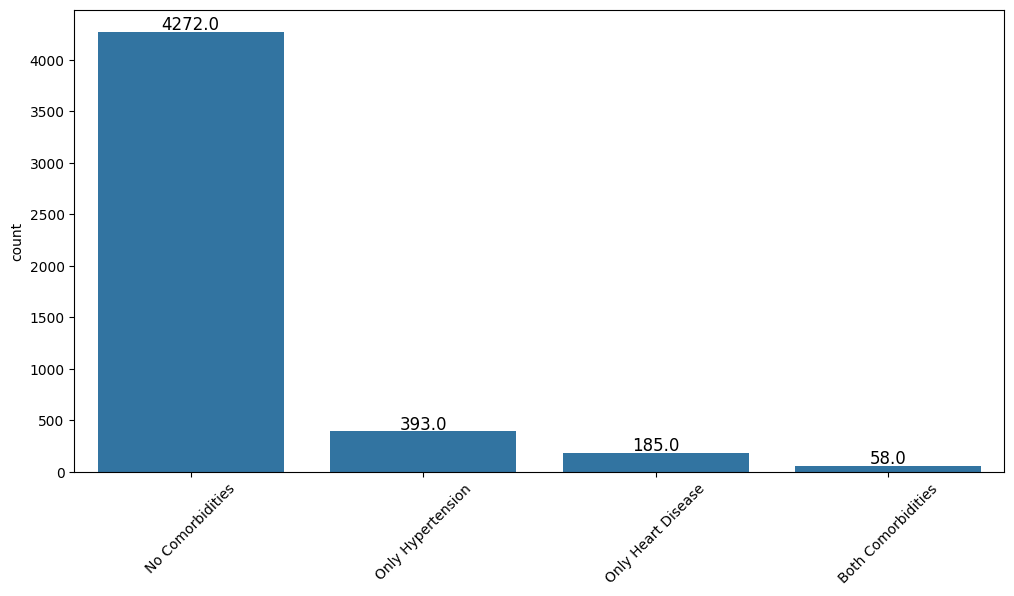

In [24]:
# Maps the labels to integers
mapping = {val: i for i, val in enumerate(values)}
key = disease_category.map(mapping)

# Plot the Disease Categories
plt.figure(figsize = (12, 6))
ax = sns.countplot(x = disease_category.iloc[key.argsort()])

# Write numbers on the columns
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                fontsize = 12, color = 'black',
                xytext = (0, 5), textcoords = 'offset points')

plt.xlabel('')
plt.setp(ax.get_xticklabels(), rotation = 45)
plt.show()

**Pie Chart**

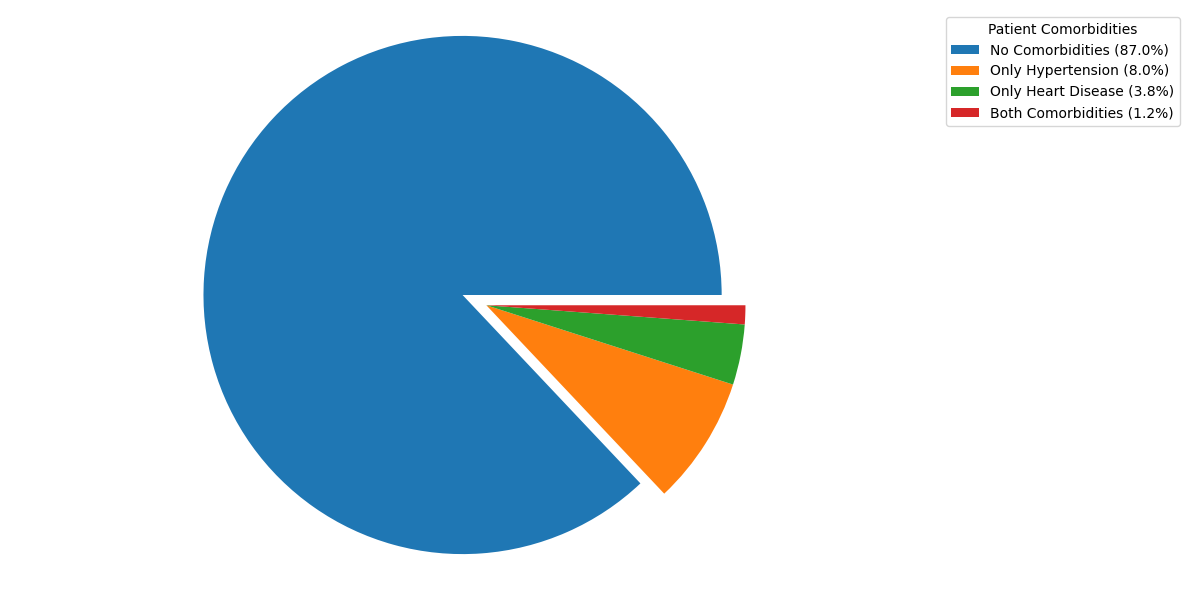

In [25]:
# Calculates the percentage of each disease category
pie_data = disease_category.value_counts(normalize = True).values * 100

# Creates labels for the pie chart
pie_label = [f'{l} ({s:0.1f}%)' for l, s in zip(values, pie_data)]

# Creates a pie chart
plt.figure(figsize = (12, 6))
wedges, texts = plt.pie(pie_data, startangle = 0, explode = [0.1, 0, 0, 0])
plt.axis('equal')     # Ensures the pie chart is a circle
plt.legend(wedges, pie_label, title = 'Patient Comorbidities', loc = 'upper left', bbox_to_anchor = (1, 0, 0.5, 1))     # Adds a legend to the pie chart
plt.tight_layout()      # Adjusts the layout to prevent overlap
plt.show()      # Displays the plot

As we have seen, most of the patients have no comorbidities. Using a pie chart can give us another visual look at the data distribution.

**Value Counts**

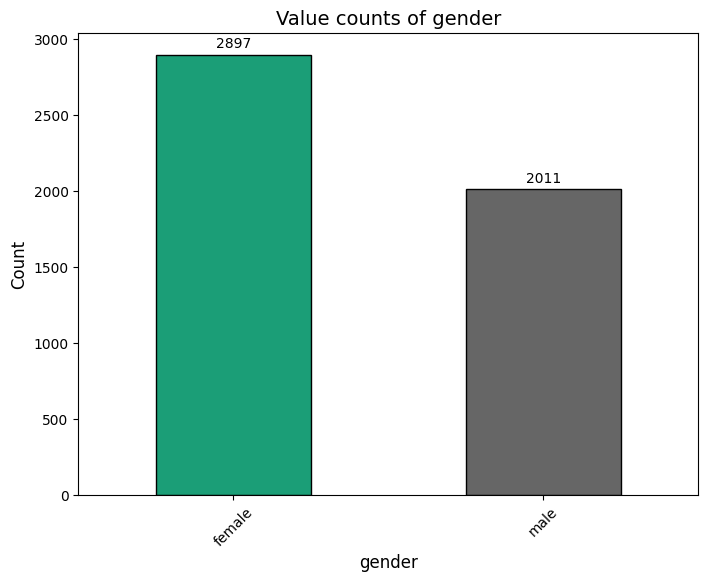

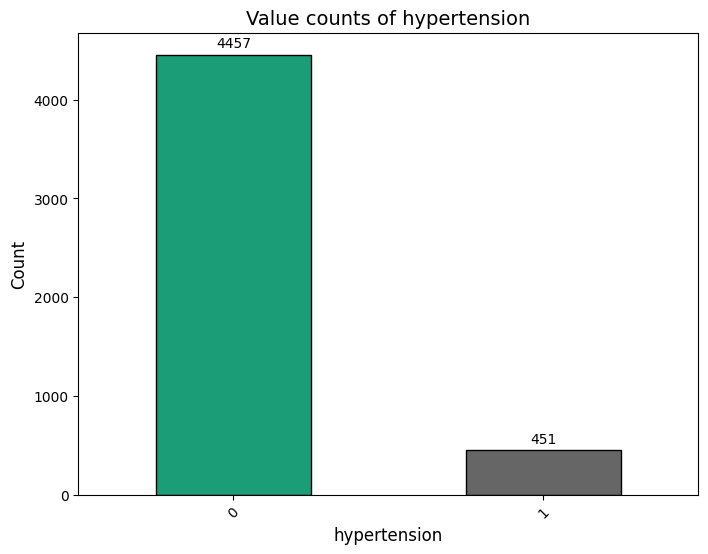

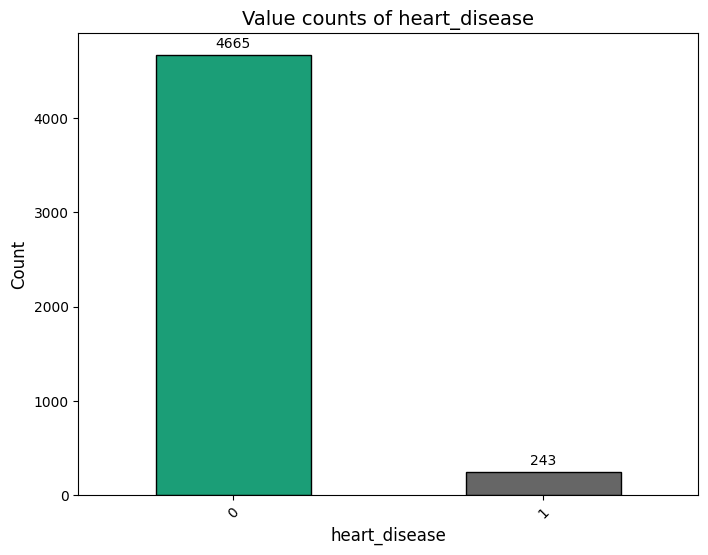

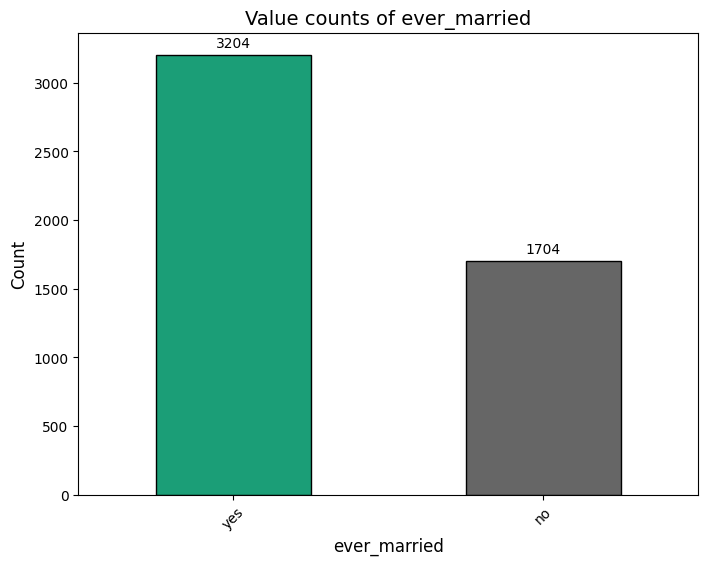

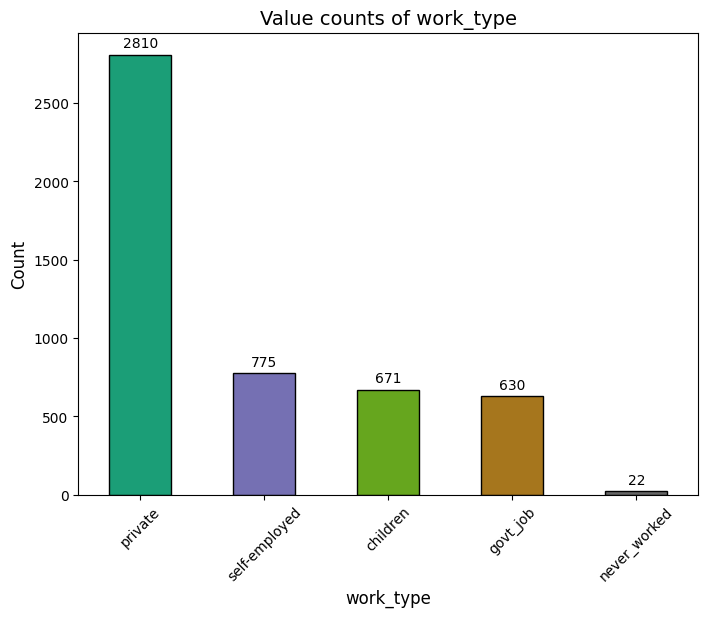

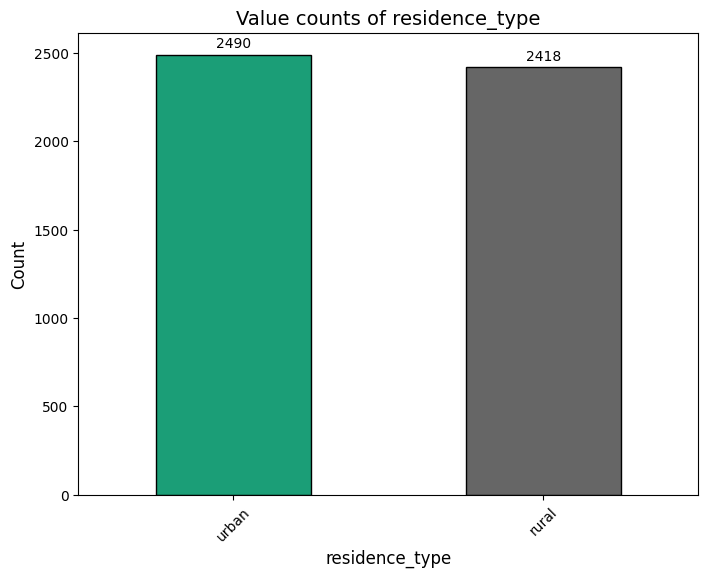

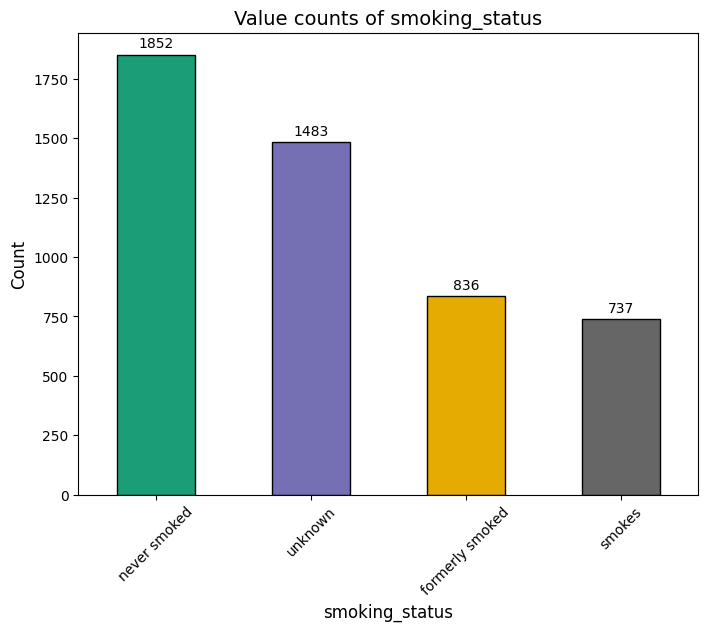

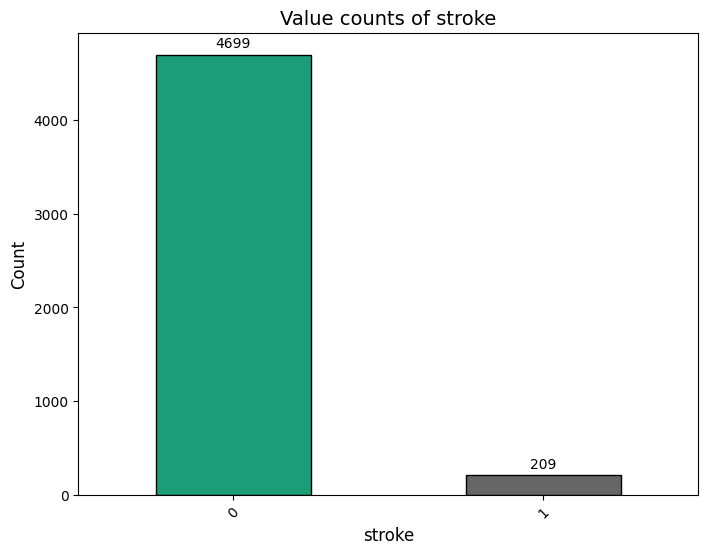

In [26]:
column_list = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status', 'stroke']

# Loop through each column and plot the chart
for col in column_list:
    value_counts = data[col].value_counts()

    # Use Dark2 color palette from matplotlib for each attribute
    num_colors = len(value_counts)
    colors = plt.cm.Dark2(np.linspace(0, 1, num_colors))      # Select bold color for each value

    # Create bar chart with separate color for each value
    plt.figure(figsize = (8, 6))
    ax = value_counts.plot(kind = 'bar', color = colors, edgecolor = 'black')

    # Add numbers to each column
    ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 10, color = 'black', padding = 3)

    # Set title and labels
    plt.title(f'Value counts of {col}', fontsize = 14)
    plt.xlabel(col, fontsize = 12)
    plt.ylabel('Count', fontsize = 12)
    plt.xticks(rotation = 45)

    # Displays the plot
    plt.show()

The number of people with stroke is too low compared to the number of people without stroke
=> The target variable (stroke) of the dataset is unbalanced.

## Stroke distribution by categorical attributes (gender, hypertension, heart_disease, ever_married, work_type, residence_type, smoking_status)

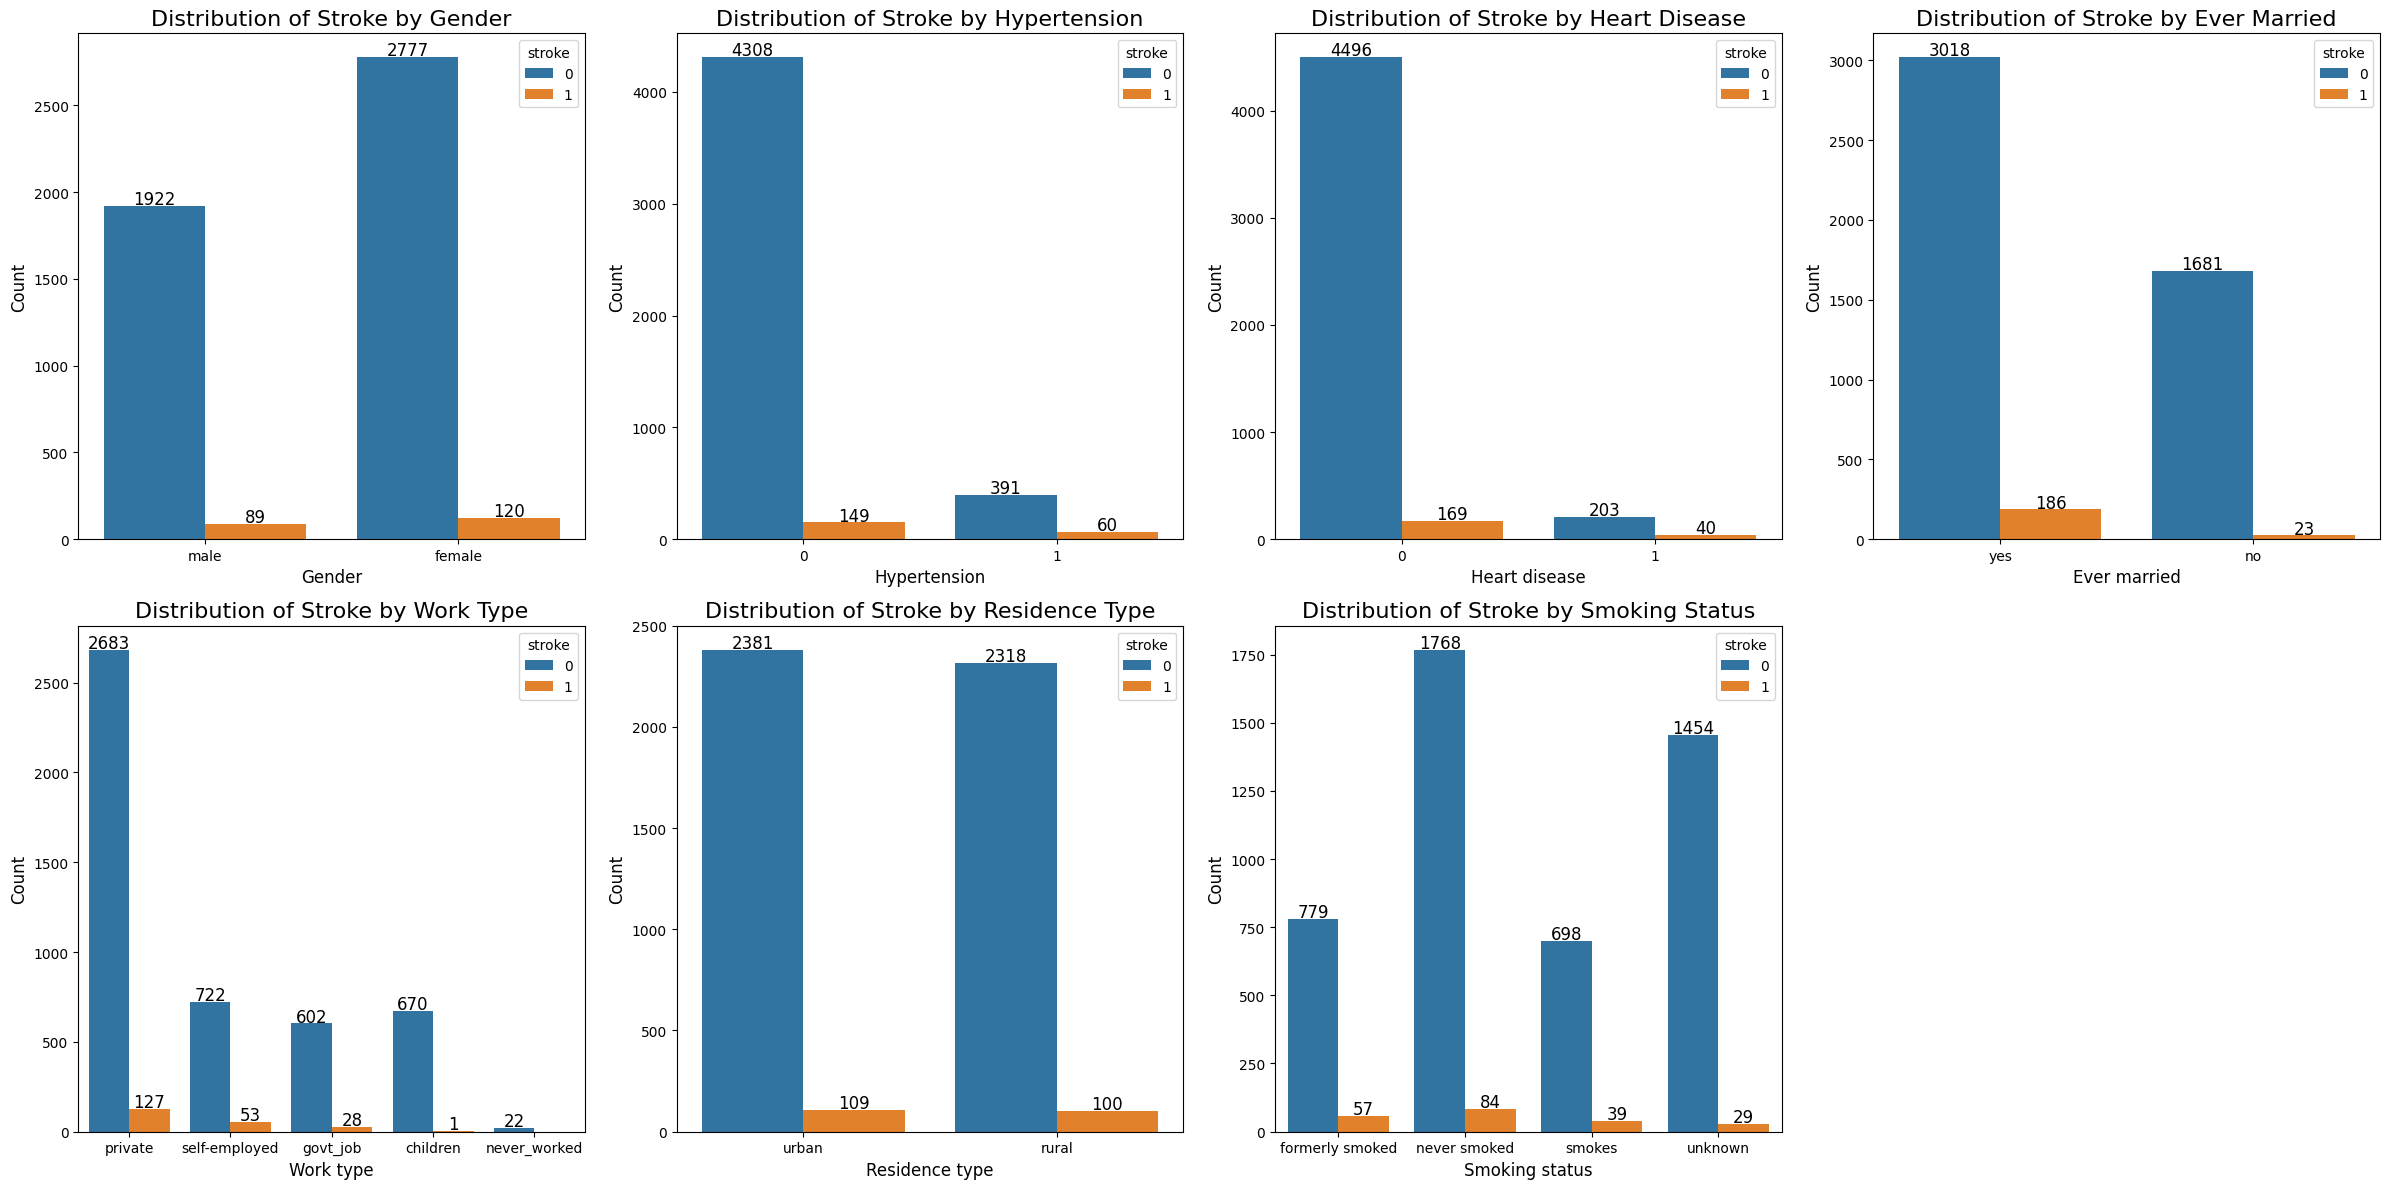

In [27]:
# Set up canvas with 2 rows x 4 columns
fig, axes = plt.subplots(2, 4, figsize = (24, 12))

# List of columns and titles
columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
titles = [
    "Distribution of Stroke by Gender",
    "Distribution of Stroke by Hypertension",
    "Distribution of Stroke by Heart Disease",
    "Distribution of Stroke by Ever Married",
    "Distribution of Stroke by Work Type",
    "Distribution of Stroke by Residence Type",
    "Distribution of Stroke by Smoking Status"
]

# Loop through each column and plot the chart
for i, column in enumerate(columns):
    row = i // 4      # Identify the row
    col = i % 4       # Identify the column
    ax = axes[row, col]
    sns.countplot(x = column, hue = 'stroke', data = data, ax = ax)
    ax.set_title(titles[i], fontsize = 16)
    ax.set_xlabel(column.replace('_', ' ').capitalize(), fontsize = 12)
    ax.set_ylabel("Count", fontsize = 12)

    # Add numbers to each column
    for p in ax.patches:
        height = p.get_height()
        if height > 0:      # Only display number if value > 0
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha = 'center', va = 'center', fontsize = 12, color = 'black',
                        xytext = (0, 5), textcoords = 'offset points')

# Hide redundant charts (if any)
if len(columns) % 4 != 0:
    for j in range(len(columns), 4 * 2):      # Total 8 charts
        fig.delaxes(axes[j // 4, j % 4])

# Align spacing and display charts
plt.tight_layout()
plt.show()

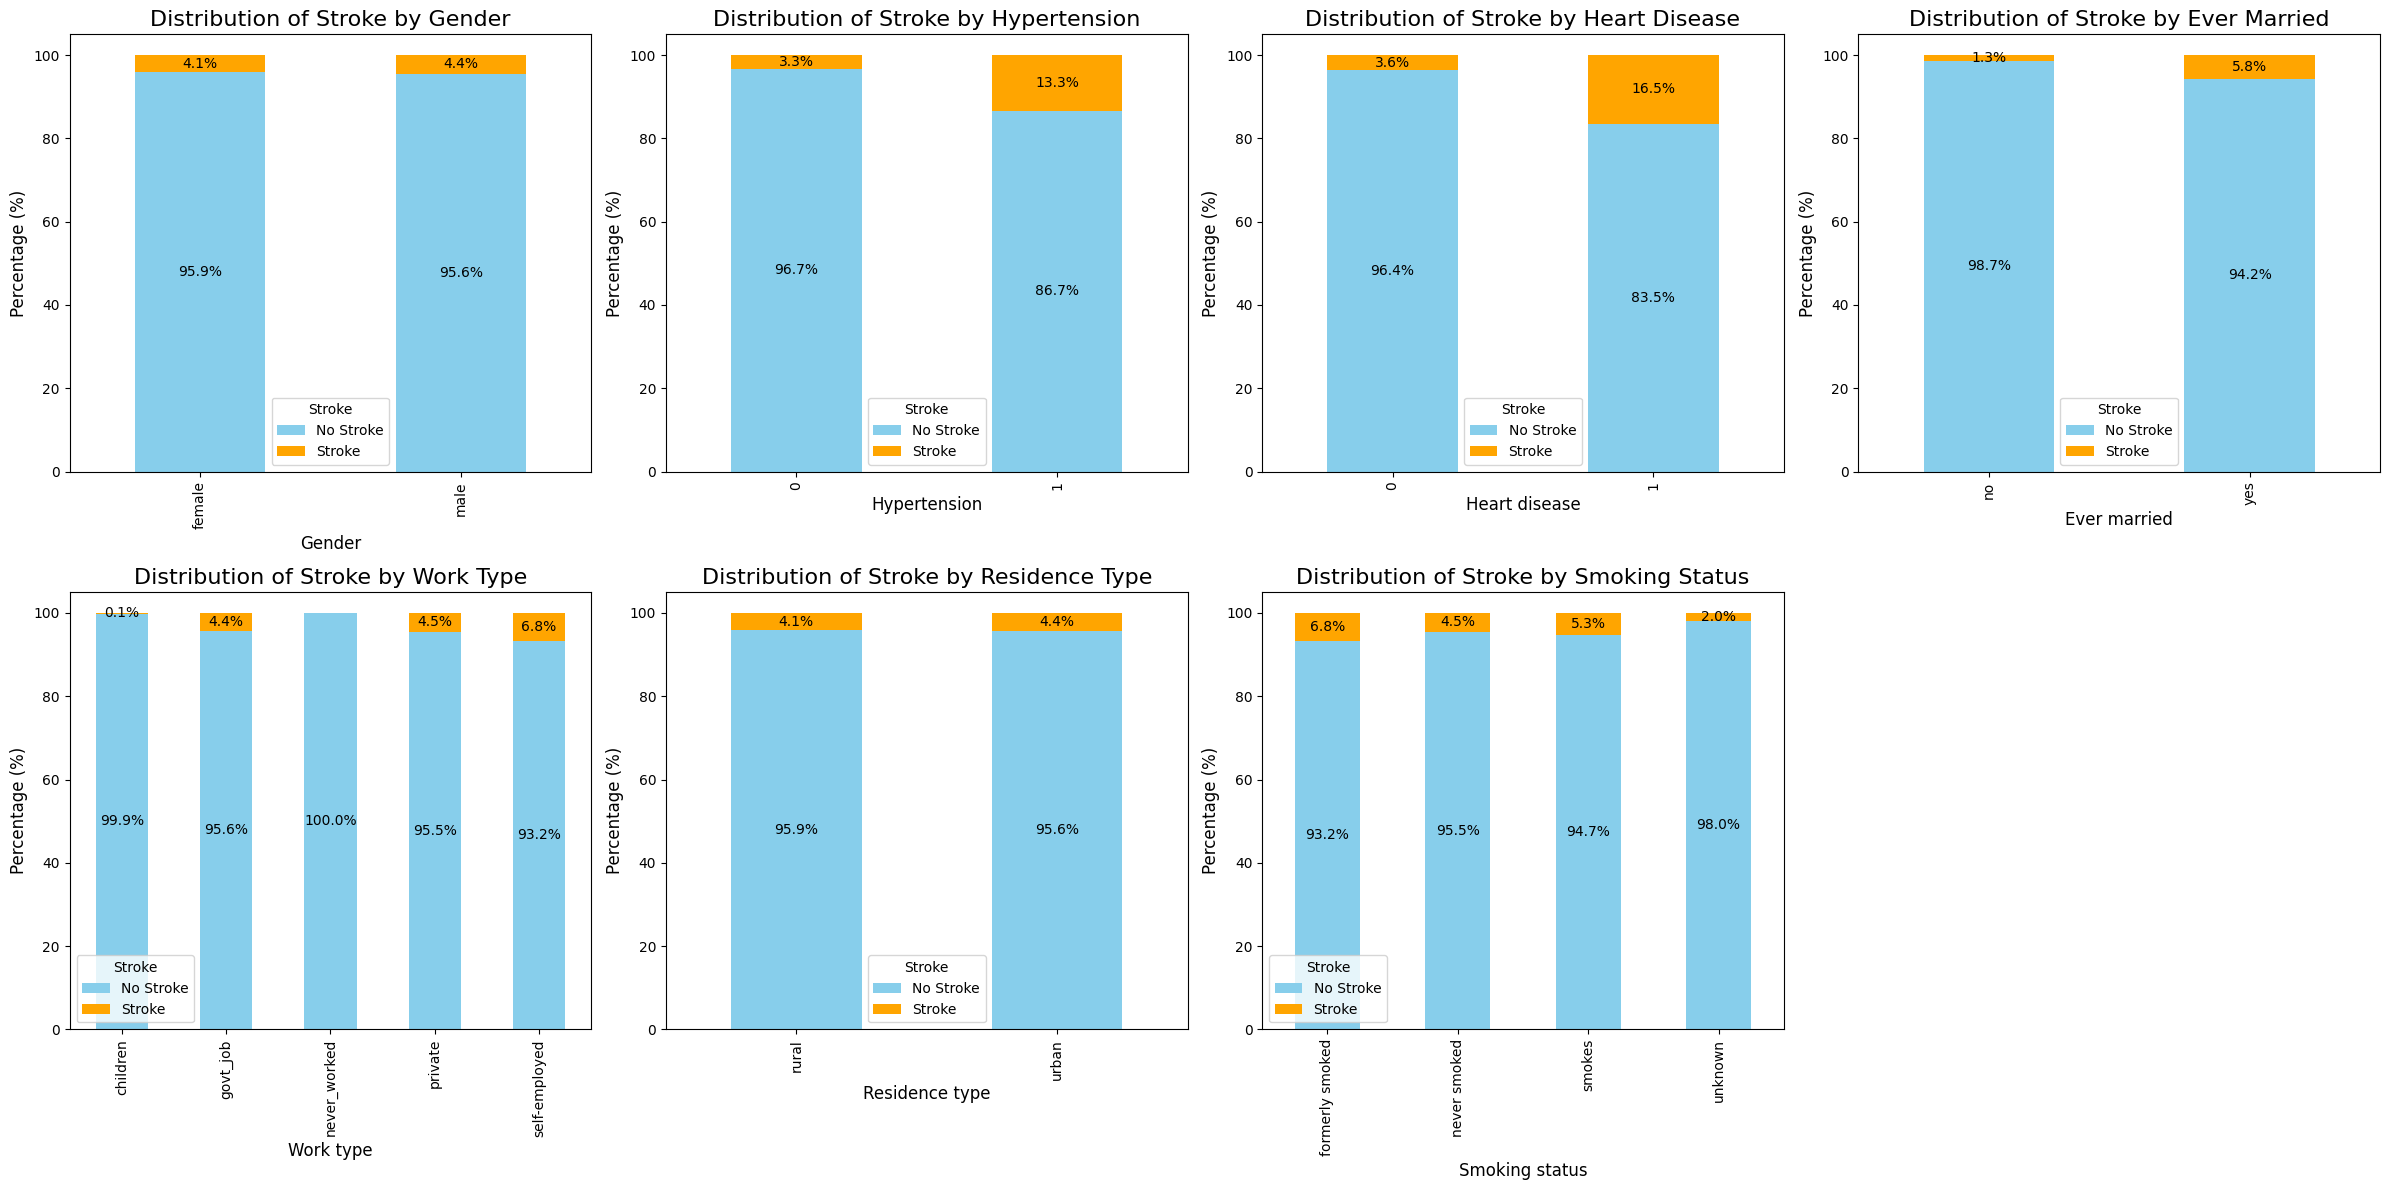

In [28]:
# Set up canvas with 2 rows x 4 columns
fig, axes = plt.subplots(2, 4, figsize = (24, 12))

# List of columns and titles
columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
titles = [
    "Distribution of Stroke by Gender",
    "Distribution of Stroke by Hypertension",
    "Distribution of Stroke by Heart Disease",
    "Distribution of Stroke by Ever Married",
    "Distribution of Stroke by Work Type",
    "Distribution of Stroke by Residence Type",
    "Distribution of Stroke by Smoking Status"
]

# Loop through each column and plot the chart
for i, column in enumerate(columns):
    row = i // 4      # Identify the row
    col = i % 4       # Identify the column
    ax = axes[row, col]

    # Calculate percentage
    percentages = (
        data.groupby([column, 'stroke']).size() / data.groupby(column).size() * 100
    ).unstack()

    # Plot the chart
    percentages.plot(kind = 'bar', stacked = True, ax = ax, color = ['skyblue', 'orange'])

    # Set title and labels
    ax.set_title(titles[i], fontsize = 16)
    ax.set_xlabel(column.replace('_', ' ').capitalize(), fontsize = 12)
    ax.set_ylabel("Percentage (%)", fontsize = 12)
    ax.legend(title = "Stroke", labels = ['No Stroke', 'Stroke'])

    # Display percentage on column
    for p in ax.patches:
        height = p.get_height()
        if height > 0:      # Only display number if value > 0
            ax.annotate(f'{height:.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_y() + height / 2),
                        ha = 'center', va = 'center', fontsize = 10, color = 'black')

# Hide redundant charts (if any)
if len(columns) % 4 != 0:
    for j in range(len(columns), 4 * 2):      # Total 8 charts
        fig.delaxes(axes[j // 4, j % 4])

# Align spacing and display charts
plt.tight_layout()
plt.show()

## Distribution of smoking_status, work_type, residence_type by gender

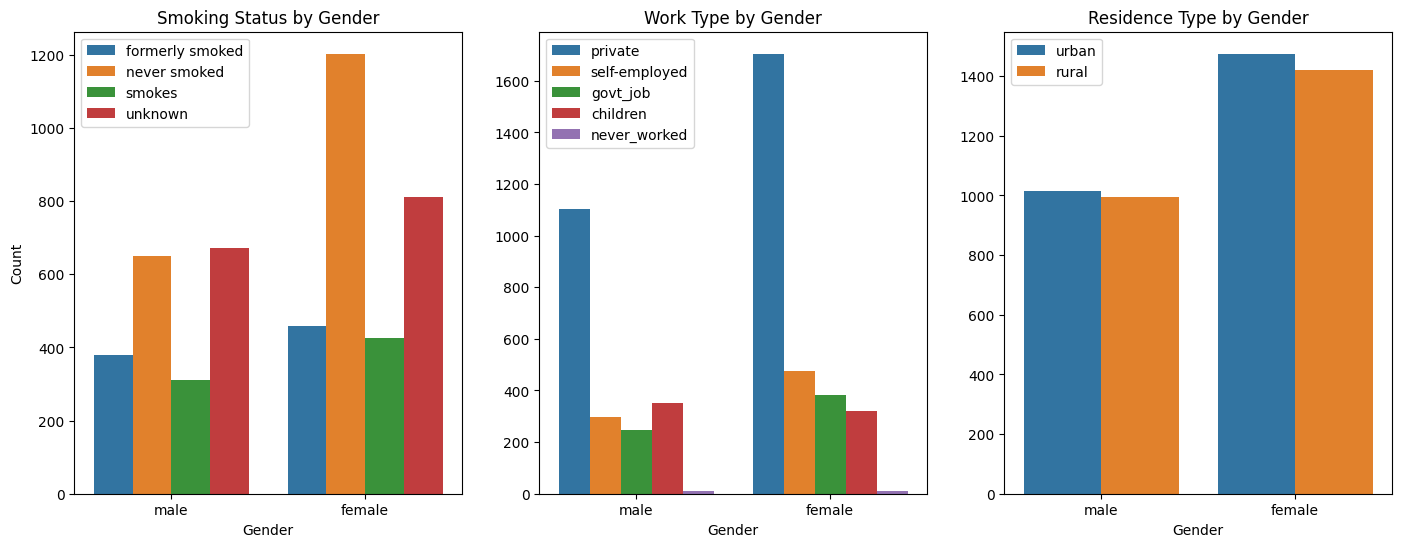

In [29]:
plt.figure(figsize = (17, 6))

plt.subplot(1, 3, 1)
sns.countplot(x = data['gender'], hue = 'smoking_status', data = data);
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Smoking Status by Gender')
plt.legend()

plt.subplot(1, 3, 2)
g1 = sns.countplot(x = data['gender'], hue = 'work_type', data = data);
plt.xlabel('Gender')
g1.set(ylabel = None)
plt.title('Work Type by Gender')
plt.legend()

plt.subplot(1, 3, 3)
g1 = sns.countplot(x = data['gender'], hue = 'residence_type', data = data);
plt.xlabel('Gender')
g1.set(ylabel = None)
plt.title('Residence Type by Gender')
plt.legend()

plt.show()

* Many women never smoke, and the "unknow" status is also high.
* For both sexes, many are employed in the "private" sector.
* In the Residence Type chart, the number of men and women living in both "urban" and "rural" areas is similar.

## Stroke distribution by age, avg_glucose_level, bmi

**Histogram**

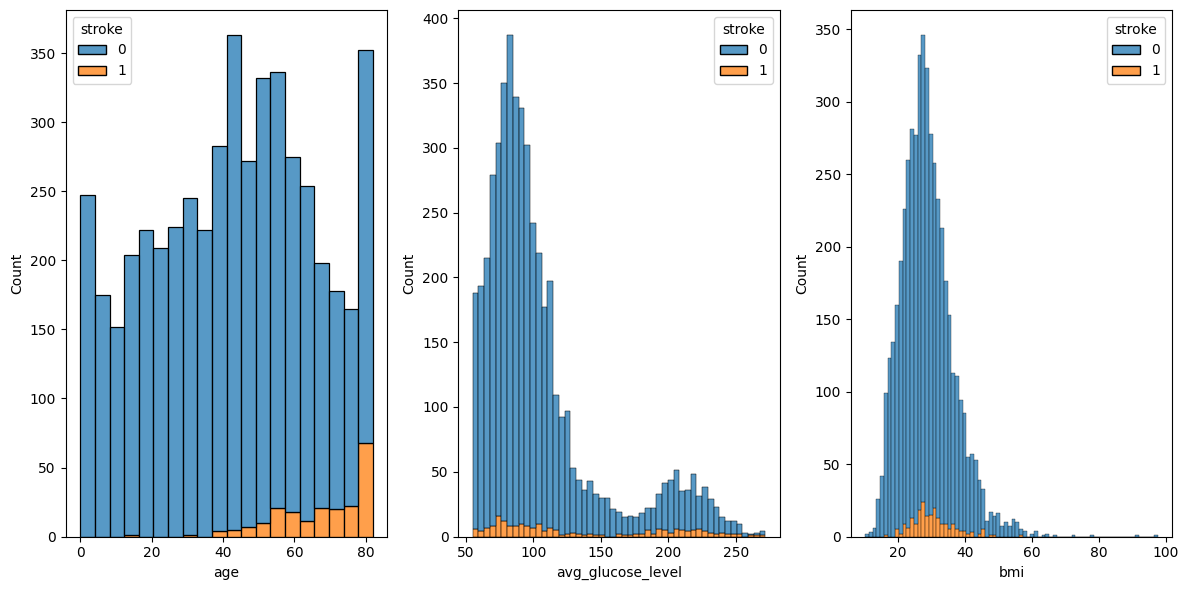

In [30]:
column_list = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize = (12, 6))      # Create a figure with 1x3 subplots

for i, col in enumerate(column_list):
  sns.histplot(data = data, x = col, hue = 'stroke', multiple = 'stack', ax = ax[i])

plt.tight_layout()
plt.show()

The dataset doesn't seem to follow a normal distribution, especially the "avg_glucose_level" and "bmi" attributes which are right skewed.

**Density Chart**

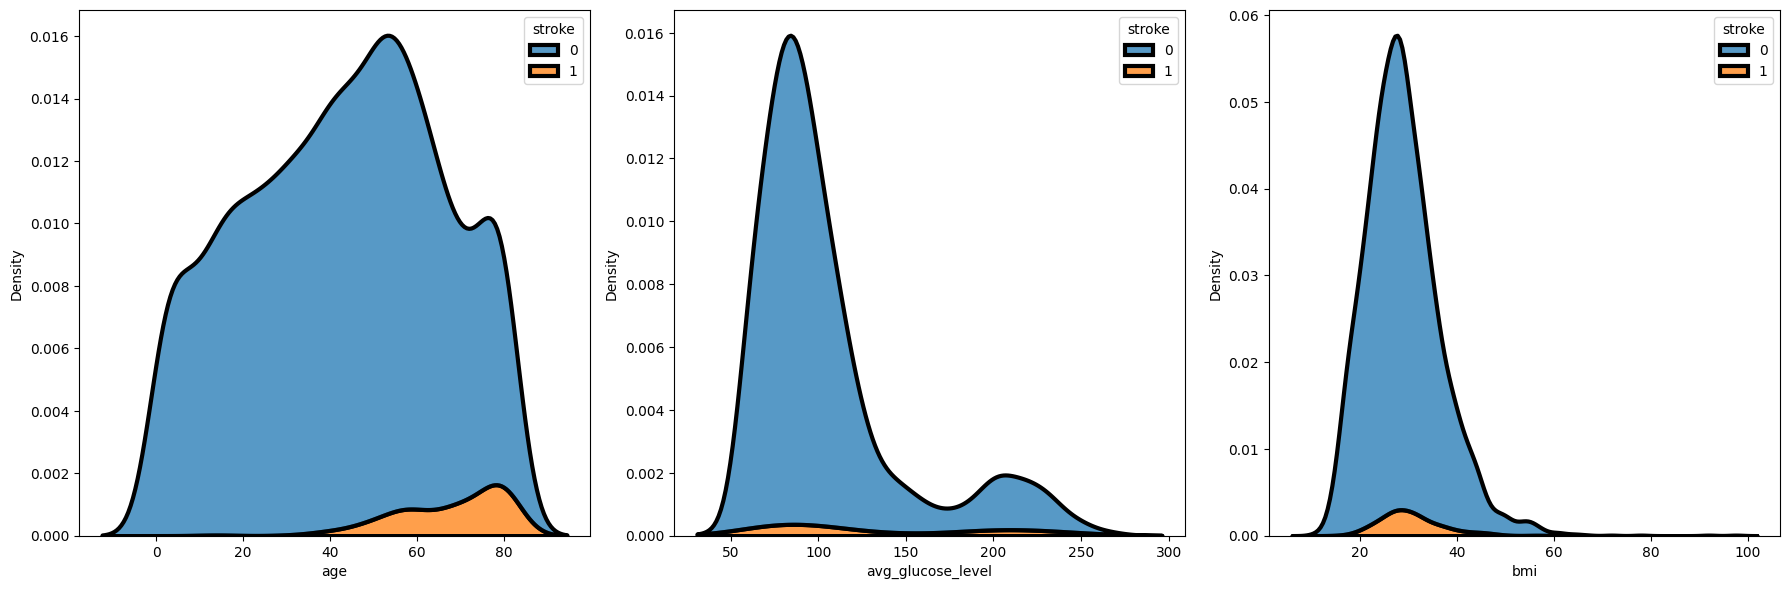

In [31]:
column_list = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize = (18, 6))      # Create a figure with 1x3 subplots

for i, col in enumerate(column_list):
  sns.kdeplot(data = data, x = col, linewidth = 3, hue = 'stroke', fill = True, multiple = 'stack', ax = ax[i])

plt.tight_layout()
plt.show()

Just by taking a quick look, we can see that most stroke patients are between 60 and 80 years old.

**Box Plot**

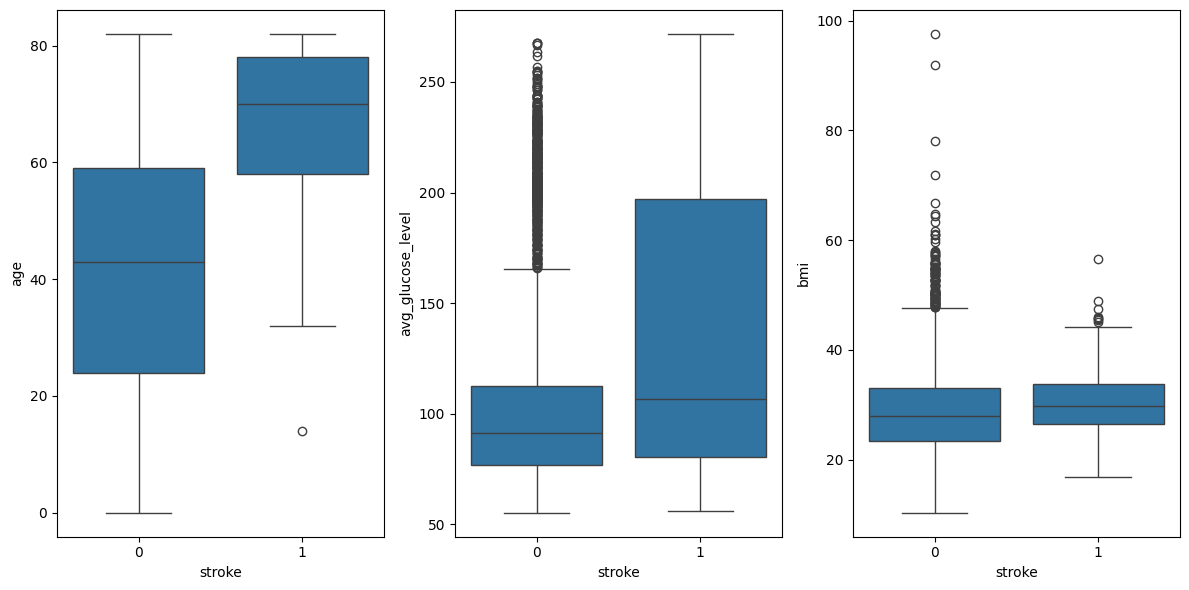

In [32]:
column_list = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize = (12, 6))      # Create a figure with 1x3 subplots

for i, col in enumerate(column_list):
  sns.boxplot(data = data, x = 'stroke', y = col, ax = ax[i])

plt.tight_layout()
plt.show()

If we split the data based on the stroke attribute, we get some important information:

* Most stroke patients are over 60 years old.
* However, it is still possible that younger people can also have strokes, as we can see there are some exceptions.
* We can assume that the age of the patient is correlated with whether or not the patient has a stroke.
* The BMI index is usually between 20 and 40.

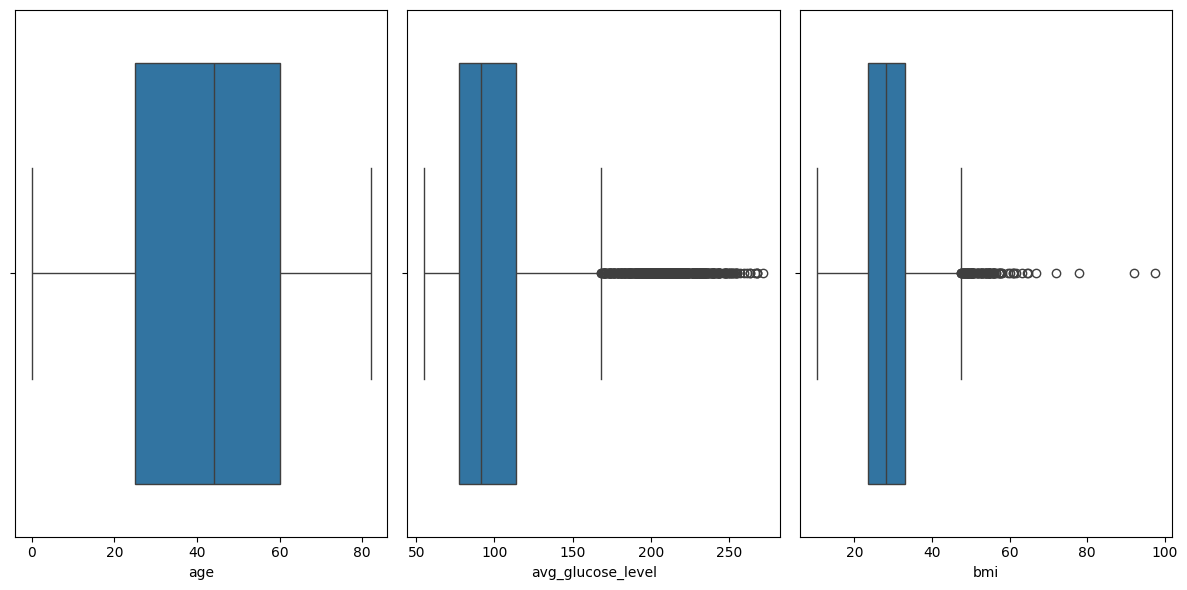

In [33]:
column_list = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize = (12, 6))      # Create a figure with 1x3 subplots

for i, col in enumerate(column_list):
  sns.boxplot(data = data, x = col, ax = ax[i])

plt.tight_layout()
plt.show()

Using the box plot, we can see that there are many outliers on the "avg_glucose_level" and "bmi" attributes.

## Relationship between age with avg_glucose_level, bmi

**Scatter Plot**

Scatter plots are often used to see the correlation between attributes. Suppose, we want to know the correlation between:

1. Patient Age and Average Glucose Level
2. Patient Age and BMI index

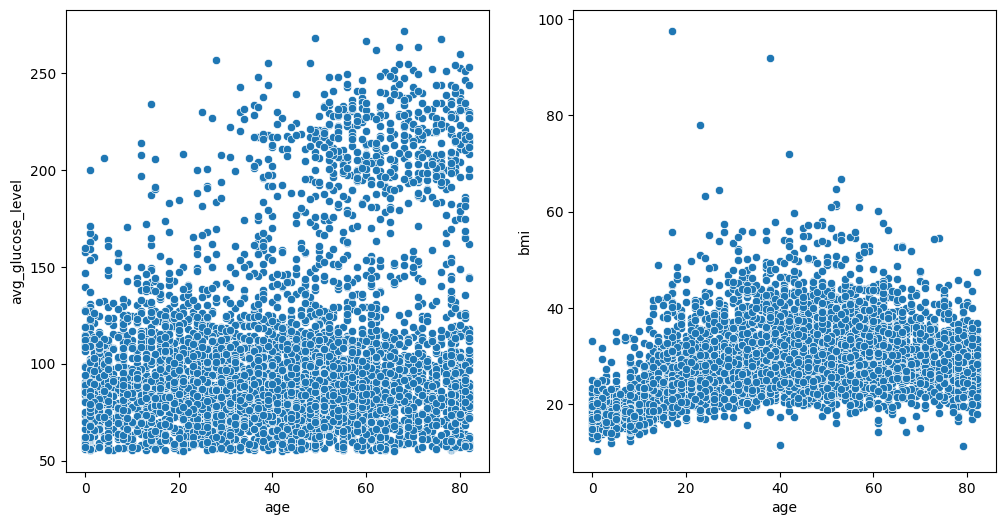

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))      # Create a figure with 1x2 subplots

sns.scatterplot(data = data, x = 'age', y = 'avg_glucose_level', ax = ax[0])
sns.scatterplot(data = data, x = 'age', y = 'bmi', ax = ax[1])

plt.show()

From the scatter plots, we can see that there is no clear correlation between "age" and "avg_glucose_level", as the data points are scattered quite loosely. However, there is a clear correlation between "age" and "bmi", indicating that older people tend to have higher BMI indices. This may be due to physiological factors such as lifestyle and diet that change with age.

## Age distribution by heart_disease, hypertension

/tmp/ipython-input-3134237043.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'heart_disease', y = 'age', data = data, palette = 'muted')
/tmp/ipython-input-3134237043.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'hypertension', y = 'age', data = data, palette = 'muted')


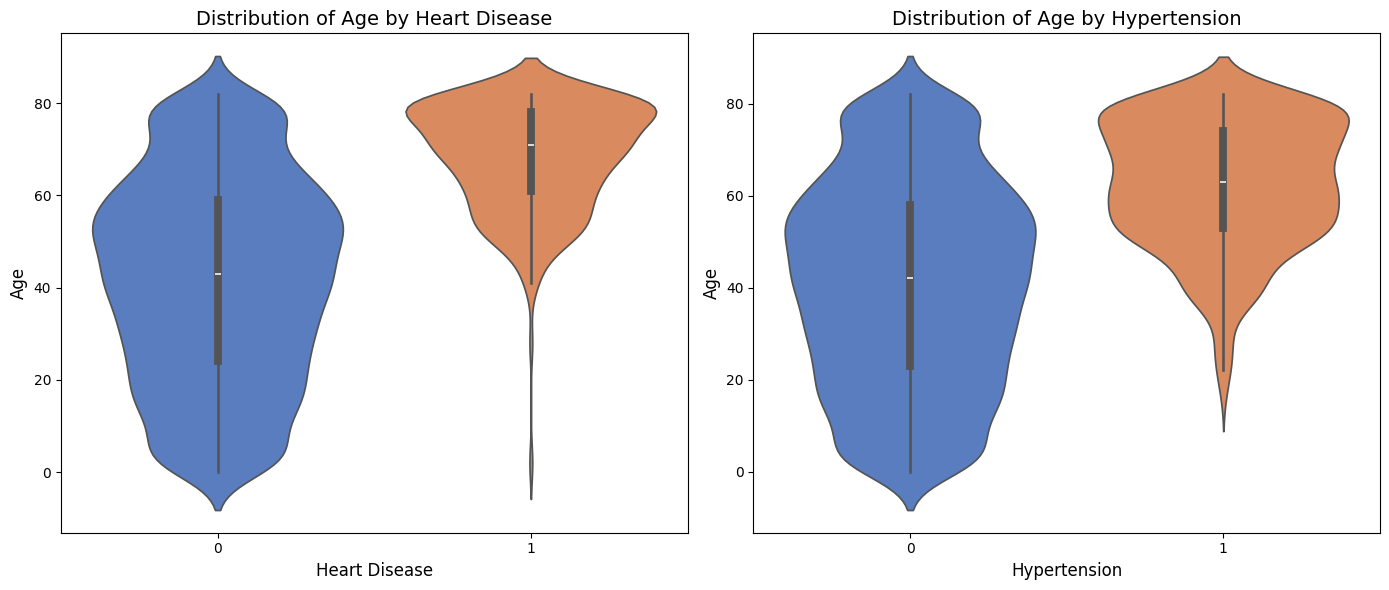

In [35]:
# Create a figure and divide it into 2 columns
plt.figure(figsize = (14, 6))

# Violin plot of Age distribution by Heart Disease
plt.subplot(1, 2, 1)  # 1 row, 2 columns, select 1st plot
sns.violinplot(x = 'heart_disease', y = 'age', data = data, palette = 'muted')
plt.xlabel('Heart Disease', fontsize = 12)
plt.ylabel('Age', fontsize = 12)
plt.title('Distribution of Age by Heart Disease', fontsize = 14)

# Violin plot of Age distribution by Hypertension
plt.subplot(1, 2, 2)  # 1 row, 2 columns, select 2nd plot
sns.violinplot(x = 'hypertension', y = 'age', data = data, palette = 'muted')
plt.xlabel('Hypertension', fontsize = 12)
plt.ylabel('Age', fontsize = 12)
plt.title('Distribution of Age by Hypertension', fontsize = 14)

# Show the charts
plt.tight_layout()  # Make sure the charts do not overlap
plt.show()

<Axes: xlabel='hypertension', ylabel='age'>

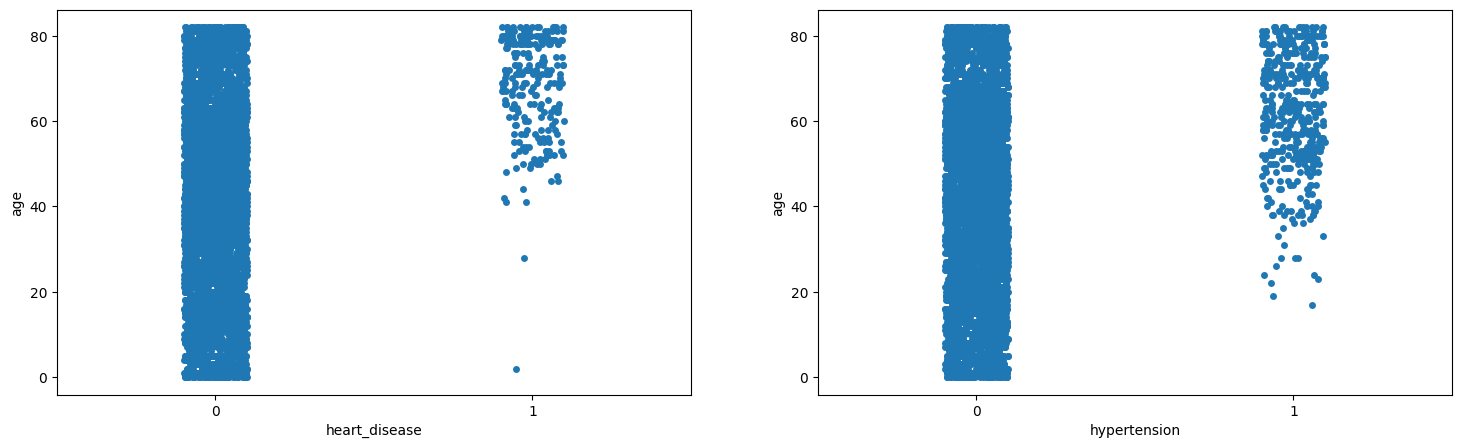

In [36]:
plt.figure(figsize = (18, 5))
plt.subplot(1, 2, 1)
sns.stripplot(data = data, x = 'heart_disease', y = 'age')
plt.subplot(1, 2, 2)
sns.stripplot(data = data, x = 'hypertension', y = 'age')

* The risk of heart disease increases in people over 50.
* The risk of hypertension increases in people over 50.

# 3. DATA PRE-PROCESSING

## Label Encoder

In [37]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67,0,1,yes,private,urban,228.69,36.6,formerly smoked,1
1,male,80,0,1,yes,private,rural,105.92,32.5,never smoked,1
2,female,49,0,0,yes,private,urban,171.23,34.4,smokes,1
3,female,79,1,0,yes,self-employed,rural,174.12,24.0,never smoked,1
4,male,81,0,0,yes,private,urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4904,female,13,0,0,no,children,rural,103.08,18.6,unknown,0
4905,female,81,0,0,yes,self-employed,urban,125.20,40.0,never smoked,0
4906,female,35,0,0,yes,self-employed,rural,82.99,30.6,never smoked,0
4907,male,51,0,0,yes,private,rural,166.29,25.6,formerly smoked,0


In [38]:
le = LabelEncoder()
lst = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
label_mapping = {}

data = data.copy()

for i in lst:
    data.loc[:, i] = le.fit_transform(data[i])
    label_mapping[i] = dict(zip(le.classes_, range(len(le.classes_))))

for feature, mapping in label_mapping.items():
    print(f"{feature} mapping: ")
    for label_str, number in mapping.items():
        print(f"   {label_str}: {number}")

gender mapping: 
   female: 0
   male: 1
ever_married mapping: 
   no: 0
   yes: 1
work_type mapping: 
   children: 0
   govt_job: 1
   never_worked: 2
   private: 3
   self-employed: 4
residence_type mapping: 
   rural: 0
   urban: 1
smoking_status mapping: 
   formerly smoked: 0
   never smoked: 1
   smokes: 2
   unknown: 3


In [39]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,3,1,228.69,36.6,0,1
1,1,80,0,1,1,3,0,105.92,32.5,1,1
2,0,49,0,0,1,3,1,171.23,34.4,2,1
3,0,79,1,0,1,4,0,174.12,24.0,1,1
4,1,81,0,0,1,3,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4904,0,13,0,0,0,0,0,103.08,18.6,3,0
4905,0,81,0,0,1,4,1,125.20,40.0,1,0
4906,0,35,0,0,1,4,0,82.99,30.6,1,0
4907,1,51,0,0,1,3,0,166.29,25.6,0,0


## Correlation Matrix

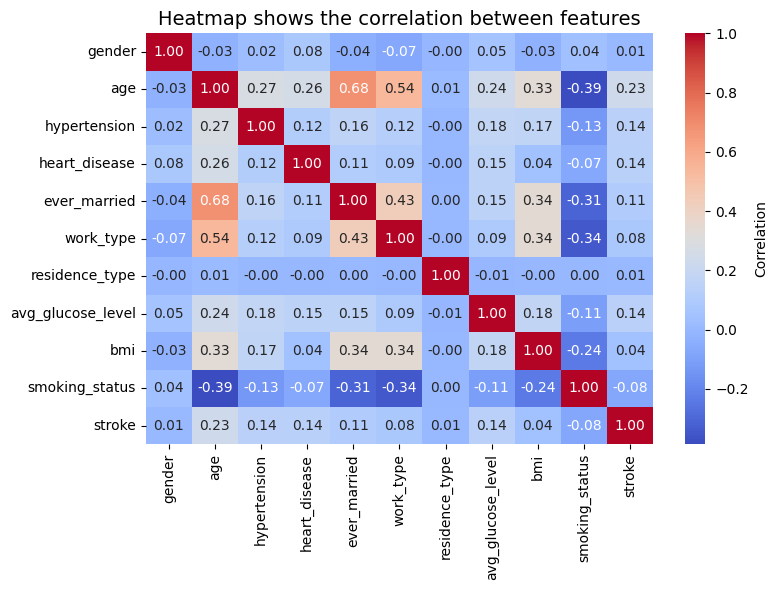

In [40]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Draw heatmap with seaborn
plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", cbar_kws = {'label': 'Correlation'})

# Add title and adjust display layout
plt.title("Heatmap shows the correlation between features", fontsize = 14)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()

# Show the heatmap
plt.show()

## Target Variable Distribution

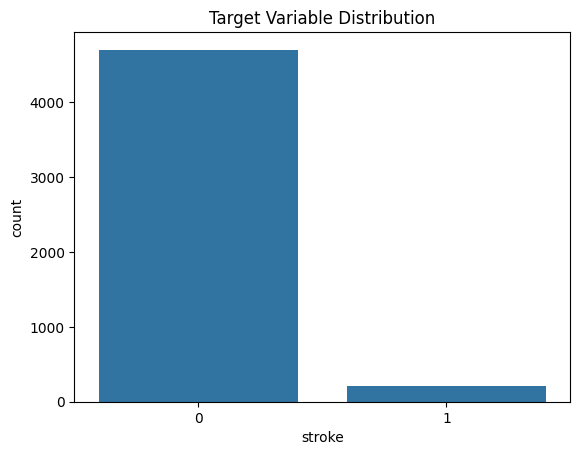

In [41]:
# Target variable (stroke) distribution chart
sns.countplot(data = data, x = 'stroke')
plt.title("Target Variable Distribution")

plt.show()

## Class Distribution

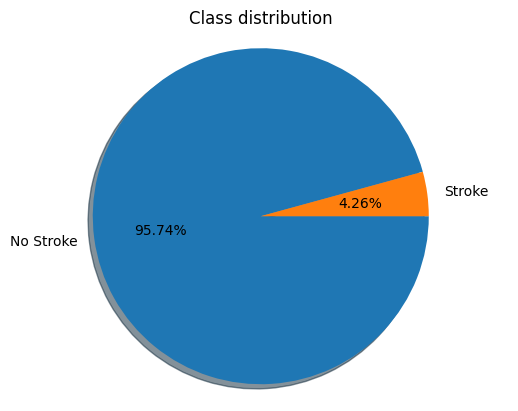

Samples associated with no stroke: 4699
Samples associated with stroke: 209


In [42]:
class_occur = data['stroke'].value_counts()
class_names = ['No Stroke', 'Stroke']

fig, ax = plt.subplots()
ax.pie(class_occur, labels = class_names, autopct = '%1.2f%%',
        shadow = True, startangle = 0, counterclock = False)
ax.axis('equal')      # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()

print("Samples associated with no stroke: {}".format(class_occur[0]))
print("Samples associated with stroke: {}".format(class_occur[1]))

# 4. PREPARE DATA FOR TRAINING

## Split / Separate X from target variable y

In [43]:
X = data.drop(['stroke'], axis = 1)
y = data['stroke']

In [44]:
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (4908, 10)
Shape of y: (4908,)


## Data Balancing / Data Augmentation (SMOTE)

In [45]:
def data_balancing(data: pd.DataFrame):

  X = data.drop(['stroke'], axis = 1)
  y = data['stroke']

  # Initializes a SMOTE (Synthetic Minority Over-sampling Technique) object
  smote = SMOTE(sampling_strategy = 'minority')

  # Resampling to oversample the minority class to balance the dataset
  X, y = smote.fit_resample(data.loc[:, data.columns != 'stroke'], data['stroke'])

  data_balanced = pd.concat([X, y], axis = 1)

  return data_balanced

## Data Discretization (KBinsDiscretizer)

In [46]:
def data_discretization(data: pd.DataFrame):

  X = data.drop(['stroke'], axis = 1)
  y = data['stroke']

  cont_cols = ['age', 'avg_glucose_level', 'bmi']

  kbd = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy = 'quantile')
  kbd.fit(X[cont_cols])

  X_disc = X.copy()
  X_disc[cont_cols] = kbd.transform(X_disc[cont_cols])

  X_disc = X_disc.round(0).astype(int)

  data_disc = pd.concat([X_disc, y], axis = 1)

  return data_disc

# 5. MODEL TRAINING & TESTING (K-Fold Cross Validation)

In [47]:
!pip install pgmpy

In [48]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import (
    PC, HillClimbSearch, MmhcEstimator, ExpertKnowledge,
    MaximumLikelihoodEstimator, BayesianEstimator
)
from pgmpy.inference import VariableElimination

import networkx as nx

from pathlib import Path

## Training

### a. Constraint-based (PC Stable)

In [49]:
# Learn structure via PC (stable variant), then fit CPDs with BayesianEstimator
def learn_pc_stable(train_data: pd.DataFrame, significance_level: float = 0.01) -> DiscreteBayesianNetwork:

  pc = PC(train_data)
  dag = pc.estimate(
      variant = 'stable',
      significance_level = significance_level,
      return_type = 'dag'
  )

  # Parameter learning with pseudo counts to avoid zeros
  model = DiscreteBayesianNetwork(dag.edges())
  model.fit(train_data, estimator = BayesianEstimator, prior_type = 'BDeu', equivalent_sample_size = 10)

  return model

### b. Score-based (Hill Climbing)

In [50]:
# Learn structure via Hill Climb Search, then fit CPDs with BayesianEstimator
def learn_hill_climbing(train_data: pd.DataFrame) -> DiscreteBayesianNetwork:

  hc = HillClimbSearch(train_data)
  dag = hc.estimate(scoring_method = 'BDeu')

  # Parameter learning with pseudo counts to avoid zeros
  model = DiscreteBayesianNetwork(dag.edges())
  model.fit(train_data, estimator = BayesianEstimator, prior_type = 'BDeu', equivalent_sample_size = 10)

  return model

### c. Hybrid (Max-Min Hill Climbing - MMHC)

In [51]:
# Learn structure via Max-Min Hill Climb, then fit CPDs with BayesianEstimator
def learn_mmhc(train_data: pd.DataFrame, significance_level: float = 0.01) -> DiscreteBayesianNetwork:

  mmhc = MmhcEstimator(train_data)
  dag = mmhc.estimate(
      scoring_method = 'BDeu',
      significance_level = significance_level
  )

  # Parameter learning with pseudo counts to avoid zeros
  model = DiscreteBayesianNetwork(dag.edges())
  model.fit(train_data, estimator = BayesianEstimator, prior_type = 'BDeu', equivalent_sample_size = 10)

  return model

### d. Expert Knowledge + Hill Climbing

In [52]:
# Learn structure via Hill Climb Search, then fit CPDs with BayesianEstimator
def learn_ekhc(train_data: pd.DataFrame) -> DiscreteBayesianNetwork:

  expert_knowledge = ExpertKnowledge(
      forbidden_edges = [
          ('stroke', 'gender'),
          ('stroke', 'age'),
          ('stroke', 'hypertension'),
          ('stroke', 'heart_disease'),
          ('stroke', 'ever_married'),
          ('stroke', 'work_type'),
          ('stroke', 'residence_type'),
          ('stroke', 'avg_glucose_level'),
          ('stroke', 'bmi'),
          ('stroke', 'smoking_status')
      ],
      required_edges = [
          ('hypertension', 'stroke'),
          ('heart_disease', 'stroke'),
          ('avg_glucose_level', 'stroke'),
          ('age', 'stroke'),
          ('age', 'avg_glucose_level'),
          ('age', 'heart_disease'),
          ('age', 'hypertension')
      ]
  )

  ekhc = HillClimbSearch(train_data)
  dag = ekhc.estimate(
      scoring_method = 'BDeu',
      expert_knowledge = expert_knowledge
  )

  # Parameter learning with pseudo counts to avoid zeros
  model = DiscreteBayesianNetwork(dag.edges())
  model.fit(train_data, estimator = BayesianEstimator, prior_type = 'BDeu', equivalent_sample_size = 10)

  return model

## Testing

In [53]:
# Predict class and probability P(target = 1 | evidence) for each row in test_data using VariableElimination. Assumes target is coded as 0/1.
def predict_bn(model: DiscreteBayesianNetwork, test_data: pd.DataFrame, target: str) -> tuple[np.ndarray, np.ndarray]:

  infer = VariableElimination(model)
  y_pred = []
  y_prob1 = []
  # Filter features to only include those present in the model's nodes
  features = [c for c in test_data.columns if c != target and c in model.nodes()]

  for _, row in test_data.iterrows():
    evidence = {f: int(row[f]) for f in features}
    q = infer.query(variables = [target], evidence = evidence)
    # q.values is an array with probabilities for each state in order 0,1,...
    probs = q.values
    # Handle cases where states may not be ordered; assume 0 then 1 by construction
    p1 = float(probs[1]) if probs.shape[0] > 1 else 0.0
    pred = int(np.argmax(probs))
    y_pred.append(pred)
    y_prob1.append(p1)

  return np.array(y_pred), np.array(y_prob1)

## Directed Acyclic Graph (DAG)

In [54]:
# Build a NetworkX DiGraph from the BN's nodes and edges
def plot_dag(model: DiscreteBayesianNetwork, title: str, save_path: Path | None = None):

  plt.figure(figsize = (8, 6))

  G = nx.DiGraph()

  try:
    G.add_nodes_from(list(model.nodes()))
  except Exception:
    G.add_nodes_from(model.nodes())

  try:
    G.add_edges_from(list(model.edges()))
  except Exception:
    G.add_edges_from(model.edges())

  pos = nx.spring_layout(G, seed = 42)
  nx.draw_networkx(G, pos = pos, with_labels = True, node_size = 1200, node_color = "#AED6F1", arrowsize = 20)

  plt.title(title)
  plt.axis('off')
  plt.tight_layout()

  if save_path is not None:
    plt.savefig(save_path, dpi = 150)
  plt.show()

## Markov Blanket

In [55]:
def analyze_markov_blanket(model: DiscreteBayesianNetwork, target: str) -> list[str]:
  try:
    return model.get_markov_blanket(target)
  except Exception:
    # Fallback to neighbors if MB not available
    parents = list(model.get_parents(target)) if hasattr(model, 'get_parents') else []
    children = list(model.get_children(target)) if hasattr(model, 'get_children') else []
    return sorted(list(set(parents + children)))

## K-Fold Cross Validation

In [56]:
out_dir = Path('./results')
out_dir.mkdir(parents = True, exist_ok = True)

target = 'stroke'
significance_level = 0.01
n_splits = 5
random_state = 42

metrics_store = {"pcstable": [], "hillclimbing": [], "mmhc": [], "ekhc": []}

In [57]:
y_np = y.values
pos_idx = np.where(y_np == 1)[0]
neg_idx = np.where(y_np == 0)[0]

rng = np.random.RandomState(random_state)
rng.shuffle(pos_idx)
rng.shuffle(neg_idx)

pos_folds = np.array_split(pos_idx, n_splits)
neg_folds = np.array_split(neg_idx, n_splits)

folds = []
for i in range(n_splits):
  test_idx = np.concatenate([pos_folds[i], neg_folds[i]])
  train_idx = np.concatenate([
    np.concatenate([f for j, f in enumerate(pos_folds) if j != i]),
    np.concatenate([f for j, f in enumerate(neg_folds) if j != i])
  ])
  folds.append((np.sort(train_idx), np.sort(test_idx)))

In [58]:
pos_idx

array([ 30, 171,  84, 198,  60, 155,  45, 181,   9, 195, 136, 186, 206,
       126,  15,  73, 165,  18, 167,  93,  75,  55, 147, 109, 108, 142,
        25, 125,  16, 172, 191,  69, 101,  67, 104, 132, 207,  95,  82,
       159, 196, 162, 150,  96, 199,  68, 156,  86, 100,  38,  24, 182,
       117,  29,  19, 135, 139,  66,  65,   5, 146,  56,  97, 128,  79,
       204, 178,  31,  12,  35,  28,  42, 115,  98, 143,  51, 118, 177,
        76,  41, 187,  78, 124,  26, 140, 168, 122,   2,  77,  46, 127,
       112,  90,  85, 141,  36, 119,  61,  22, 138, 111,  33,  11, 203,
       166,   6,  27, 170, 200, 144,   4,  32, 113, 152, 120, 193, 114,
        10,  62, 148, 153, 173,   0, 202, 183,  70, 163,  64,  44, 137,
        40, 123,  23, 158, 154,  81,  39, 176,  47,  94, 161,  43, 145,
         3, 105,  53, 133, 189, 164, 194,  49,  80,  34,   7, 110,  91,
        83, 185, 190,  89,   8,  13,  59, 180, 131,  17,  72, 184, 134,
       175, 192,  63,  54, 107,  50, 174, 205, 169,  58,  48,  8

In [59]:
neg_idx

array([2395, 3561, 2860, ...,  411, 3719, 1942])

In [60]:
pos_folds

[array([ 30, 171,  84, 198,  60, 155,  45, 181,   9, 195, 136, 186, 206,
        126,  15,  73, 165,  18, 167,  93,  75,  55, 147, 109, 108, 142,
         25, 125,  16, 172, 191,  69, 101,  67, 104, 132, 207,  95,  82,
        159, 196, 162]),
 array([150,  96, 199,  68, 156,  86, 100,  38,  24, 182, 117,  29,  19,
        135, 139,  66,  65,   5, 146,  56,  97, 128,  79, 204, 178,  31,
         12,  35,  28,  42, 115,  98, 143,  51, 118, 177,  76,  41, 187,
         78, 124,  26]),
 array([140, 168, 122,   2,  77,  46, 127, 112,  90,  85, 141,  36, 119,
         61,  22, 138, 111,  33,  11, 203, 166,   6,  27, 170, 200, 144,
          4,  32, 113, 152, 120, 193, 114,  10,  62, 148, 153, 173,   0,
        202, 183,  70]),
 array([163,  64,  44, 137,  40, 123,  23, 158, 154,  81,  39, 176,  47,
         94, 161,  43, 145,   3, 105,  53, 133, 189, 164, 194,  49,  80,
         34,   7, 110,  91,  83, 185, 190,  89,   8,  13,  59, 180, 131,
         17,  72, 184]),
 array([134, 175, 192,  

In [61]:
neg_folds

[array([2395, 3561, 2860, 2313, 3267, 2656, 2012,  596, 2719, 4737, 4719,
        3175, 1233,  700, 3021, 1068, 2174, 2454, 4829,  506, 3952, 3883,
        1241, 3801,  770, 4298,  309, 2435, 2292, 4180, 2197, 3753, 1964,
         217,  739, 2779, 4287, 4246, 2816, 3354, 1560, 3103, 2682, 1712,
        4091, 4823, 1390, 4167,  786, 1583,  623, 2145, 2822, 3595,  232,
        1479, 2272, 1464, 1238, 1775, 2650,  833, 3623, 2889,  353, 4466,
         436,  974, 4768, 4305, 2687, 4852, 1258, 2489, 2525, 3193, 2622,
         505, 1836, 2607,  439, 4163, 1338, 3044, 2309, 4697, 4591,  496,
         242, 2858, 1863, 4202, 4126, 3359, 1792, 2578, 2789, 2692, 1893,
        1722,  408, 3985, 3090, 1040,  388, 3115, 3245, 2101, 1978, 2170,
         795,  635, 2964, 1642,  798, 1146, 4464, 4440, 2663, 4854, 2128,
        2511, 2894, 1710, 1745,  892, 1689,  288, 3957, 4206, 3935, 1706,
        4008,  842, 2993, 1253, 3323, 4252, 2931, 2228, 2880,  457, 3553,
         274,  851, 1584, 3411, 4101, 

In [62]:
folds

[(array([   0,    1,    2, ..., 4903, 4904, 4907]),
  array([   9,   15,   16,   18,   25,   30,   45,   55,   60,   67,   69,
           73,   75,   82,   84,   93,   95,  101,  104,  108,  109,  125,
          126,  132,  136,  142,  147,  155,  159,  162,  165,  167,  171,
          172,  181,  186,  191,  195,  196,  198,  206,  207,  217,  221,
          226,  228,  232,  235,  238,  240,  242,  252,  254,  256,  260,
          270,  273,  274,  277,  278,  279,  288,  289,  299,  302,  304,
          305,  308,  309,  315,  318,  329,  331,  341,  343,  344,  348,
          353,  358,  359,  360,  361,  366,  375,  377,  384,  386,  388,
          393,  400,  401,  404,  405,  408,  412,  414,  415,  423,  428,
          436,  437,  439,  442,  447,  448,  449,  457,  460,  461,  463,
          483,  496,  499,  500,  505,  506,  507,  514,  517,  518,  524,
          527,  531,  559,  560,  563,  580,  582,  585,  587,  588,  596,
          600,  602,  619,  623,  624,  625,  63

Fold 1: train 0 = 3759, 1 = 167 | test 0 = 940, 1 = 42


  0%|          | 0/5 [00:00<?, ?it/s]

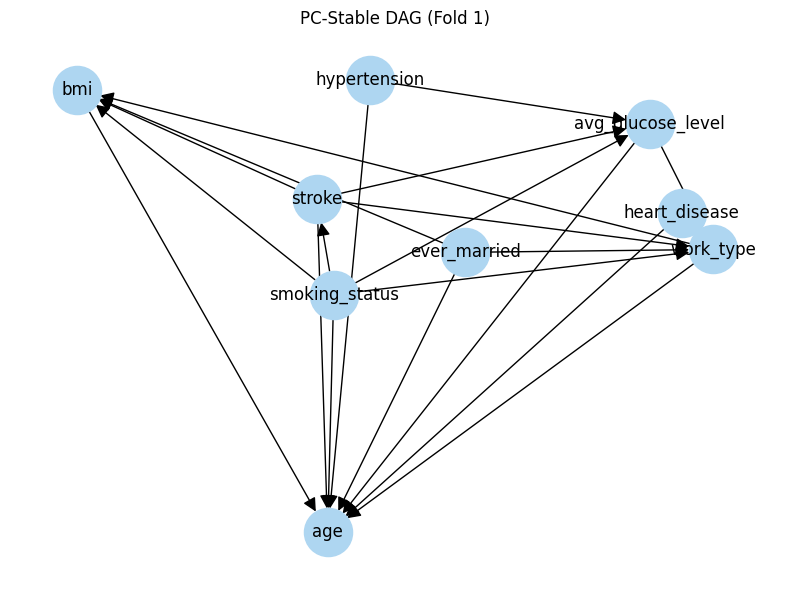

  0%|          | 0/1000000 [00:00<?, ?it/s]

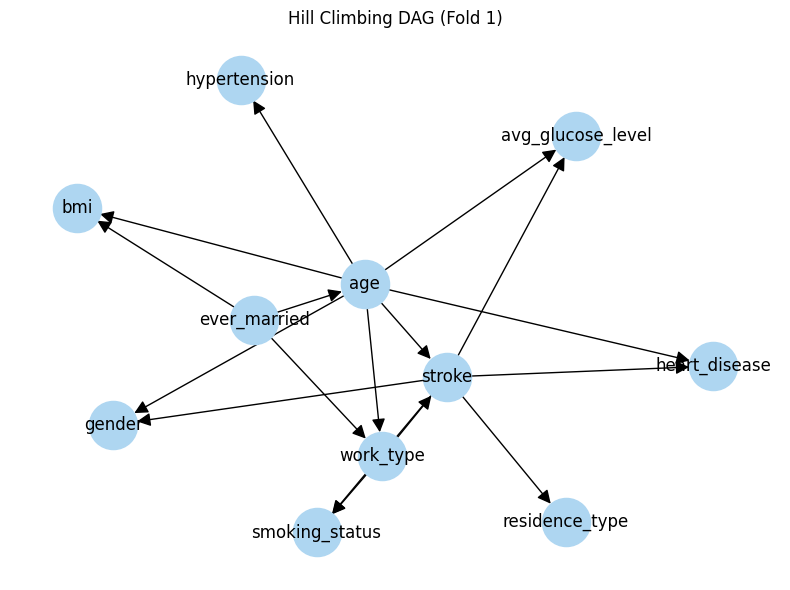

  0%|          | 0/1000000 [00:00<?, ?it/s]

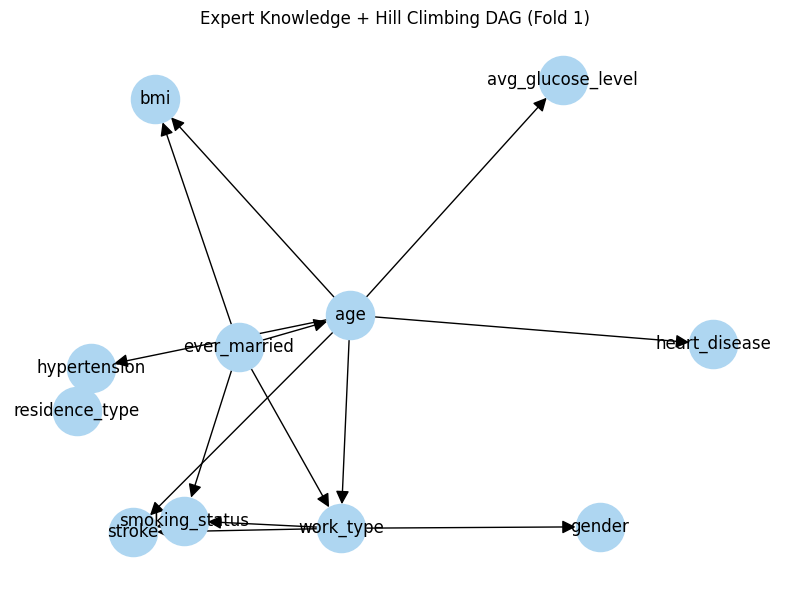

Fold 1 - Markov Blanket of 'stroke':
  PC-Stable:      ['work_type', 'avg_glucose_level', 'ever_married', 'hypertension', 'age', 'heart_disease', 'bmi', 'smoking_status']
  Hill Climbing:  ['work_type', 'avg_glucose_level', 'gender', 'residence_type', 'heart_disease', 'age', 'smoking_status']
  EKHC:           ['age', 'work_type', 'smoking_status']
Fold 2: train 0 = 3759, 1 = 167 | test 0 = 940, 1 = 42


  0%|          | 0/5 [00:00<?, ?it/s]

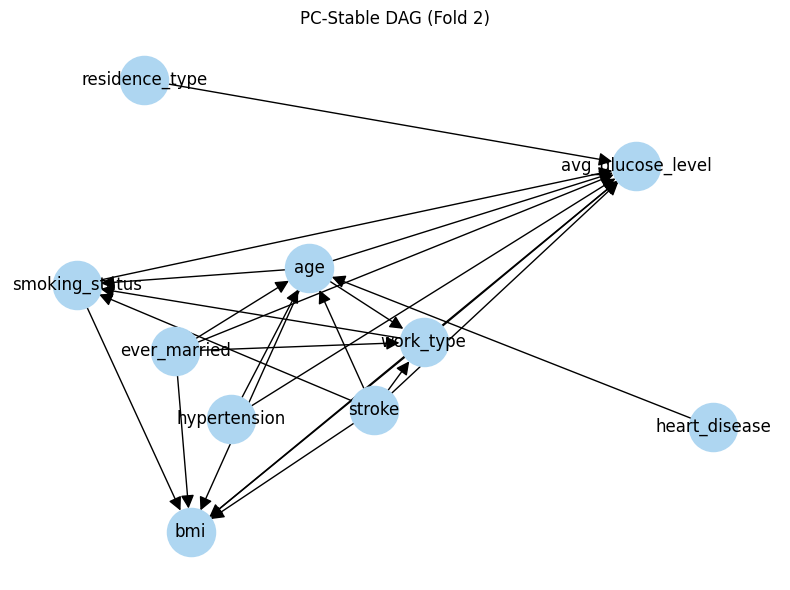

  0%|          | 0/1000000 [00:00<?, ?it/s]

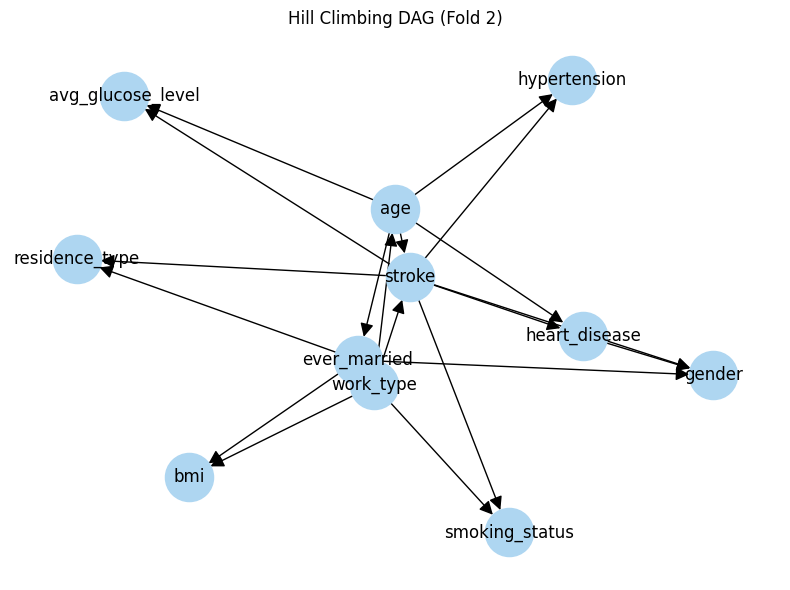

  0%|          | 0/1000000 [00:00<?, ?it/s]

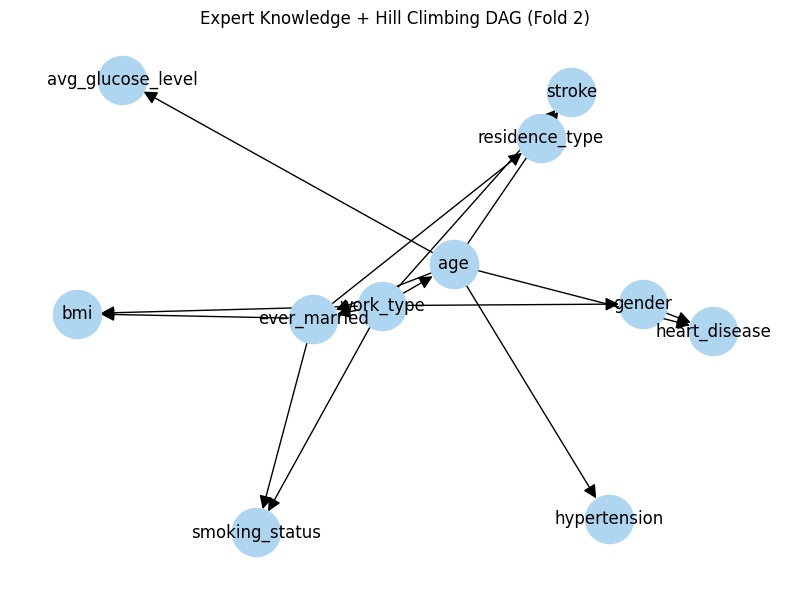

Fold 2 - Markov Blanket of 'stroke':
  PC-Stable:      ['work_type', 'avg_glucose_level', 'ever_married', 'hypertension', 'residence_type', 'age', 'heart_disease', 'bmi', 'smoking_status']
  Hill Climbing:  ['work_type', 'avg_glucose_level', 'gender', 'ever_married', 'hypertension', 'residence_type', 'heart_disease', 'age', 'smoking_status']
  EKHC:           ['residence_type', 'age', 'work_type']
Fold 3: train 0 = 3759, 1 = 167 | test 0 = 940, 1 = 42


  0%|          | 0/5 [00:00<?, ?it/s]

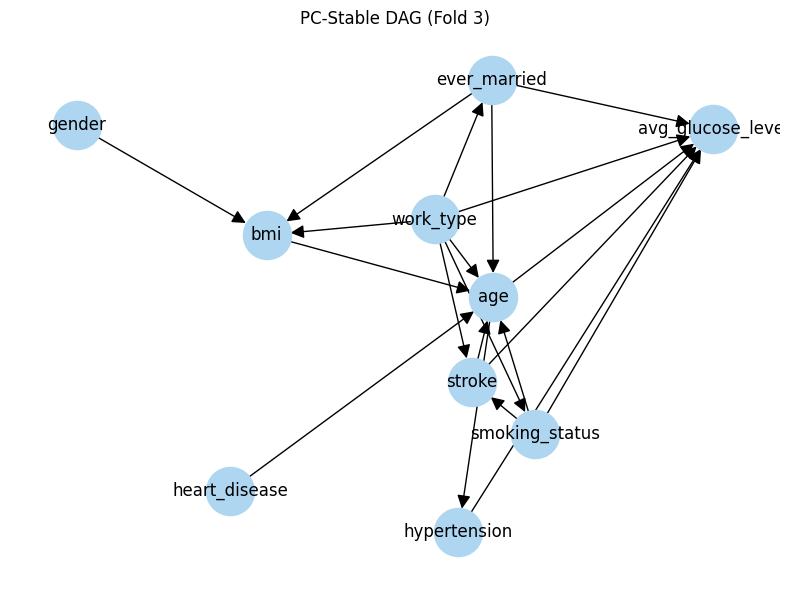

  0%|          | 0/1000000 [00:00<?, ?it/s]

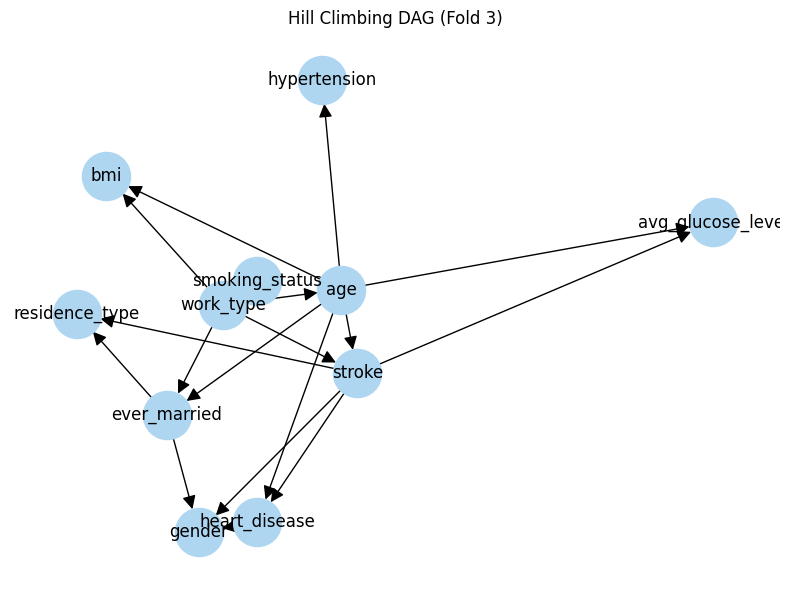

  0%|          | 0/1000000 [00:00<?, ?it/s]

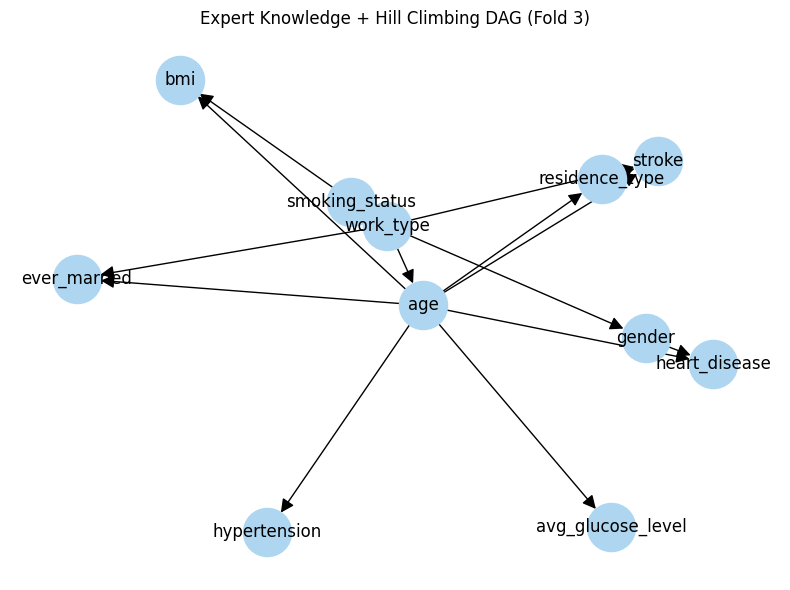

Fold 3 - Markov Blanket of 'stroke':
  PC-Stable:      ['work_type', 'avg_glucose_level', 'ever_married', 'hypertension', 'age', 'heart_disease', 'bmi', 'smoking_status']
  Hill Climbing:  ['work_type', 'avg_glucose_level', 'gender', 'ever_married', 'residence_type', 'heart_disease', 'age']
  EKHC:           ['residence_type', 'age', 'work_type']
Fold 4: train 0 = 3759, 1 = 167 | test 0 = 940, 1 = 42


  0%|          | 0/5 [00:00<?, ?it/s]

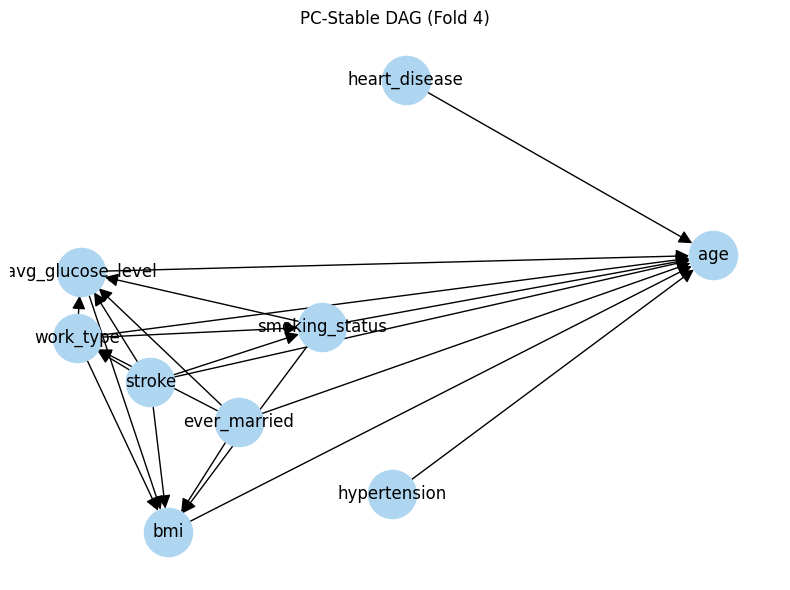

  0%|          | 0/1000000 [00:00<?, ?it/s]

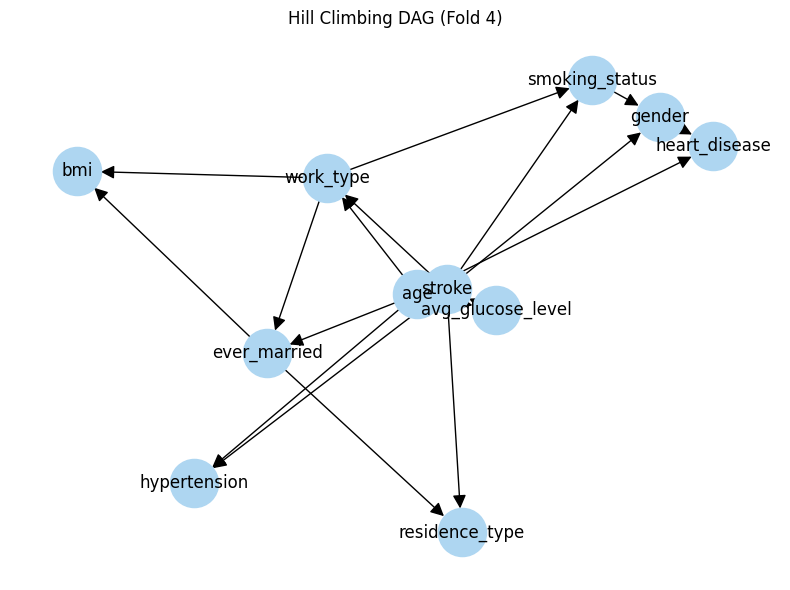

  0%|          | 0/1000000 [00:00<?, ?it/s]

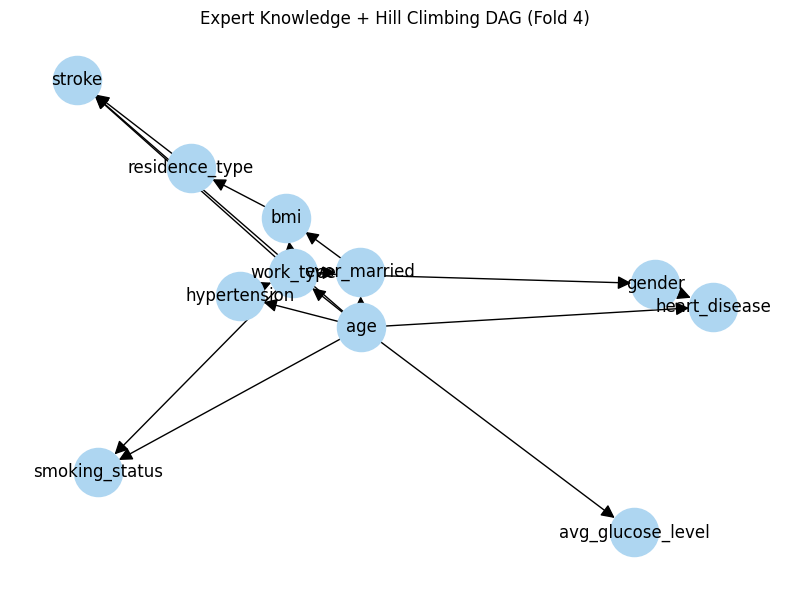

Fold 4 - Markov Blanket of 'stroke':
  PC-Stable:      ['work_type', 'avg_glucose_level', 'ever_married', 'hypertension', 'age', 'heart_disease', 'bmi', 'smoking_status']
  Hill Climbing:  ['work_type', 'avg_glucose_level', 'gender', 'ever_married', 'hypertension', 'residence_type', 'age', 'smoking_status']
  EKHC:           ['residence_type', 'age', 'work_type']
Fold 5: train 0 = 3760, 1 = 168 | test 0 = 939, 1 = 41


  0%|          | 0/5 [00:00<?, ?it/s]

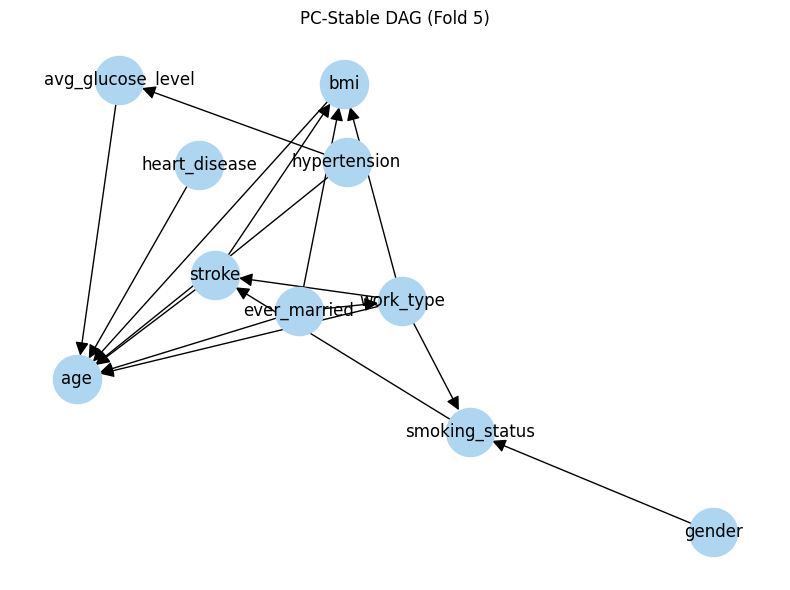

  0%|          | 0/1000000 [00:00<?, ?it/s]

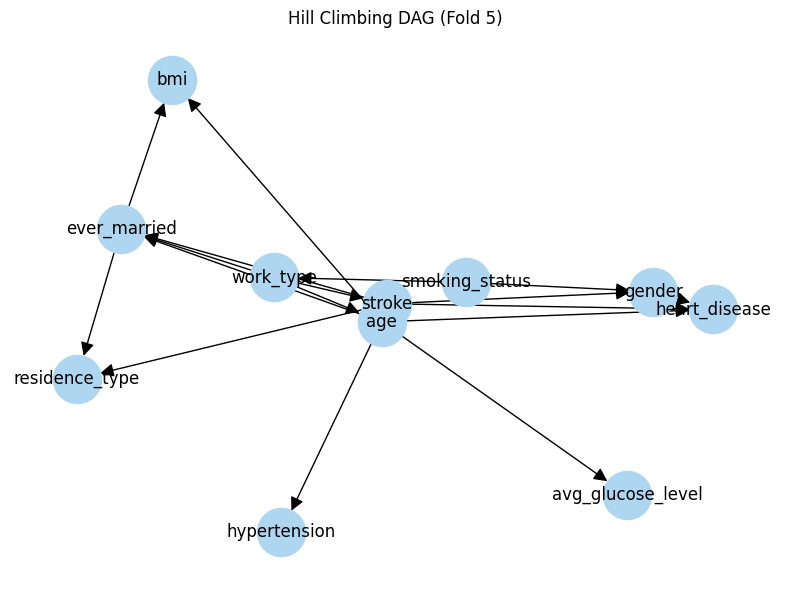

  0%|          | 0/1000000 [00:00<?, ?it/s]

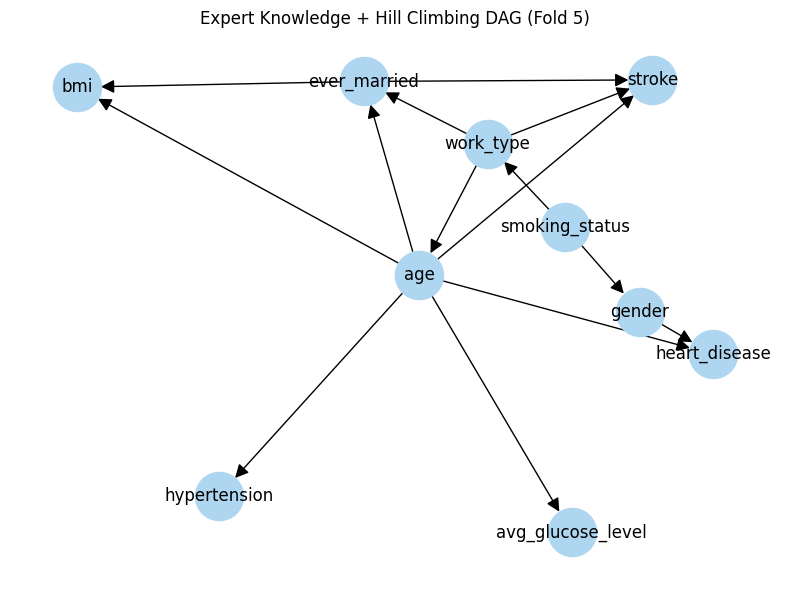

Fold 5 - Markov Blanket of 'stroke':
  PC-Stable:      ['work_type', 'avg_glucose_level', 'ever_married', 'hypertension', 'age', 'heart_disease', 'bmi', 'smoking_status']
  Hill Climbing:  ['work_type', 'gender', 'ever_married', 'residence_type', 'heart_disease', 'age', 'smoking_status']
  EKHC:           ['age', 'ever_married', 'work_type']


In [63]:
for fold_idx, (train_idx, test_idx) in enumerate(folds, start = 1):

  # Verify per-fold class counts
  y_train = y.iloc[train_idx]
  y_test = y.iloc[test_idx]

  print(
    f"Fold {fold_idx}: "
    f"train 0 = { (y_train == 0).sum() }, 1 = { (y_train == 1).sum() } | "
    f"test 0 = { (y_test == 0).sum() }, 1 = { (y_test == 1).sum() }"
  )
  # print(y_train)
  # print(y_test)

  train_data_orig = data.iloc[train_idx].reset_index(drop = True)
  test_data_orig = data.iloc[test_idx].reset_index(drop = True)

  # Export test data (original) for this fold / Save test dataset to .csv file
  testdata_path = out_dir / f"testdata_{fold_idx}.csv"
  test_data_orig.to_csv(testdata_path, index = False)

  # Balance only train data
  train_data_balanced = data_balancing(train_data_orig)
  data_balanced = pd.concat([train_data_balanced, test_data_orig], axis = 0)

  # Discretize data
  data_disc = data_discretization(data_balanced)

  # Create train and test data
  train_data = data_disc.iloc[train_idx].reset_index(drop = True)
  test_data = data_disc.iloc[test_idx].reset_index(drop = True)

  # Separate features/target for metrics
  y_test = test_data[target].values

  # ------------------
  # Model 1: PC Stable
  # ------------------
  model_pc = learn_pc_stable(train_data, significance_level = significance_level)
  y_pred_pc, y_prob_pc = predict_bn(model_pc, test_data, target)

  # Save results
  res_pc = pd.DataFrame({
      'y_true': y_test,
      'y_pred': y_pred_pc,
      'prob_no_stroke': 1 - y_prob_pc,
      'prob_stroke': y_prob_pc
  })
  res_pc_path = out_dir / f"testresult_pcstable_{fold_idx}.csv"
  res_pc.to_csv(res_pc_path, index = False)

  # Metrics
  metrics_store["pcstable"].append({
      'accuracy': accuracy_score(y_test, y_pred_pc),
      'precision': precision_score(y_test, y_pred_pc, zero_division = 0),
      'recall': recall_score(y_test, y_pred_pc, zero_division = 0),
      'f1': f1_score(y_test, y_pred_pc, zero_division = 0),
      'auc': roc_auc_score(y_test, y_prob_pc) if len(np.unique(y_test)) > 1 else np.nan
  })

  # Plot DAG
  plot_dag(model_pc, f"PC-Stable DAG (Fold {fold_idx})", out_dir / f"dag_pcstable_{fold_idx}.png")

  # Analyze Markov Blanket
  mb_pc = analyze_markov_blanket(model_pc, target)

  # ----------------------
  # Model 2: Hill Climbing
  # ----------------------
  model_hc = learn_hill_climbing(train_data)
  y_pred_hc, y_prob_hc = predict_bn(model_hc, test_data, target)

  # Save results
  res_hc = pd.DataFrame({
      'y_true': y_test,
      'y_pred': y_pred_hc,
      'prob_no_stroke': 1 - y_prob_hc,
      'prob_stroke': y_prob_hc
  })
  res_hc_path = out_dir / f"testresult_hillclimbing_{fold_idx}.csv"
  res_hc.to_csv(res_hc_path, index = False)

  # Metrics
  metrics_store["hillclimbing"].append({
      'accuracy': accuracy_score(y_test, y_pred_hc),
      'precision': precision_score(y_test, y_pred_hc, zero_division = 0),
      'recall': recall_score(y_test, y_pred_hc, zero_division = 0),
      'f1': f1_score(y_test, y_pred_hc, zero_division = 0),

      'auc': roc_auc_score(y_test, y_prob_hc) if len(np.unique(y_test)) > 1 else np.nan
  })

  # Plot DAG
  plot_dag(model_hc, f"Hill Climbing DAG (Fold {fold_idx})", out_dir / f"dag_hillclimbing_{fold_idx}.png")

  # Analyze Markov Blanket
  mb_hc = analyze_markov_blanket(model_hc, target)

  # # -----------------
  # # Model 3: MMHC
  # # -----------------
  # model_mmhc = learn_mmhc(train_data, significance_level = significance_level)
  # y_pred_mm, y_prob_mm = predict_bn(model_mmhc, test_data, target)

  # # Save results
  # res_mm = pd.DataFrame({
  #     'y_true': y_test,
  #     'y_pred': y_pred_mm,
  #     'prob_no_stroke': 1 - y_prob_mm,
  #     'prob_stroke': y_prob_mm
  # })
  # res_mm_path = out_dir / f"testresult_mmhc_{fold_idx}.csv"
  # res_mm.to_csv(res_mm_path, index = False)

  # # Metrics
  # metrics_store["mmhc"].append({
  #     'accuracy': accuracy_score(y_test, y_pred_mm),
  #     'precision': precision_score(y_test, y_pred_mm, zero_division = 0),
  #     'recall': recall_score(y_test, y_pred_mm, zero_division = 0),
  #     'f1': f1_score(y_test, y_pred_mm, zero_division = 0),
  #     'auc': roc_auc_score(y_test, y_prob_mm) if len(np.unique(y_test)) > 1 else np.nan
  # })

  # # Plot DAG
  # plot_dag(model_mmhc, f"Max-Min Hill Climbing DAG (Fold {fold_idx})", out_dir / f"dag_mmhc_{fold_idx}.png")

  # # Analyze Markov Blanket
  # mb_mm = analyze_markov_blanket(model_mmhc, target)

  # -----------------
  # Model 4: Expert Knowledge + Hill Climbing (EKHC)
  # -----------------
  model_ekhc = learn_ekhc(train_data)
  y_pred_ek, y_prob_ek = predict_bn(model_ekhc, test_data, target)

  # Save results
  res_ek = pd.DataFrame({
      'y_true': y_test,
      'y_pred': y_pred_ek,
      'prob_no_stroke': 1 - y_prob_ek,
      'prob_stroke': y_prob_ek
  })
  res_ek_path = out_dir / f"testresult_ekhc_{fold_idx}.csv"
  res_ek.to_csv(res_ek_path, index = False)

  # Metrics
  metrics_store["ekhc"].append({
      'accuracy': accuracy_score(y_test, y_pred_ek),
      'precision': precision_score(y_test, y_pred_ek, zero_division = 0),
      'recall': recall_score(y_test, y_pred_ek, zero_division = 0),
      'f1': f1_score(y_test, y_pred_ek, zero_division = 0),
      'auc': roc_auc_score(y_test, y_prob_ek) if len(np.unique(y_test)) > 1 else np.nan
  })

  # Plot DAG
  plot_dag(model_ekhc, f"Expert Knowledge + Hill Climbing DAG (Fold {fold_idx})", out_dir / f"dag_ekhc_{fold_idx}.png")

  # Analyze Markov Blanket
  mb_ek = analyze_markov_blanket(model_ekhc, target)

  # Print Markov Blanket for interpretability
  print(f"Fold {fold_idx} - Markov Blanket of '{target}':")
  print(f"  PC-Stable:      {mb_pc}")
  print(f"  Hill Climbing:  {mb_hc}")
  # print(f"  MMHC:           {mb_mm}")
  print(f"  EKHC:           {mb_ek}")

# 6. COMPARE RESULTS & EVALUATE PERFORMANCE

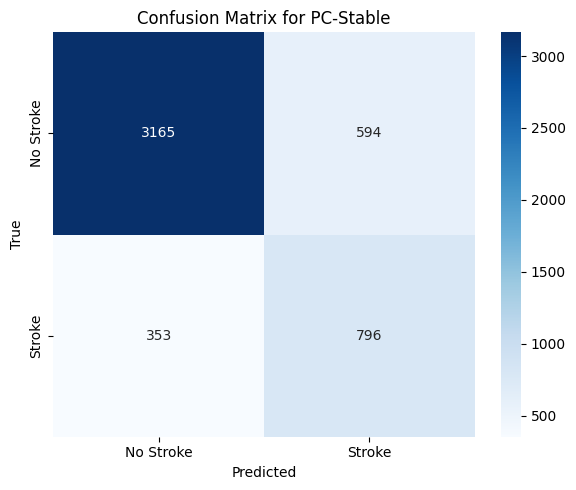

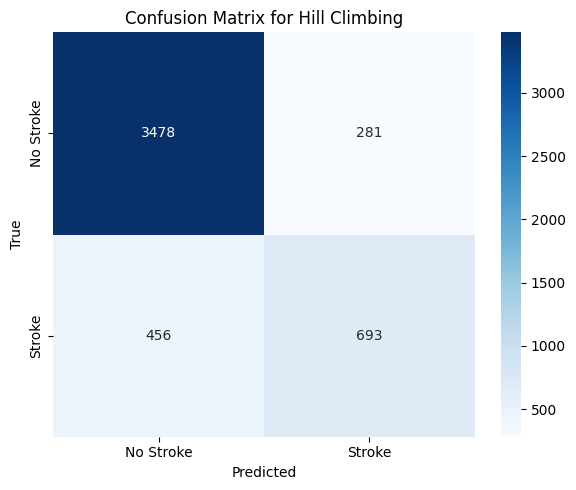

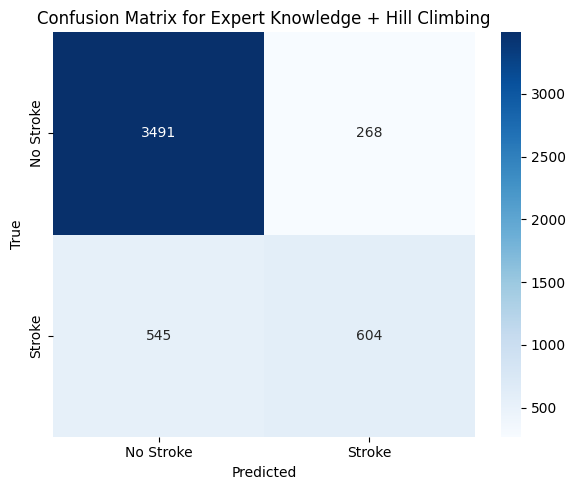

In [64]:
# Confusion Matrix
def plot_confusion_matrix(model_key: str, model_title: str):

  files = sorted(out_dir.glob(f"testresult_{model_key}_*.csv"))
  if not files:
    print(f"No results found for testresult_{model_key}_*.csv in {out_dir.resolve()}")
    return

  y_true_all, y_pred_all = [], []
  for f in files:
    df = pd.read_csv(f)
    y_true_all.extend(df['y_true'].astype(int).values)
    y_pred_all.extend(df['y_pred'].astype(int).values)

  # Calculate the Confusion Matrix
  cm = confusion_matrix(y_true_all, y_pred_all, labels = [0, 1])

  # Create a heatmap for the Confusion Matrix
  plt.figure(figsize = (6, 5))
  sns.heatmap(
    cm, annot = True, fmt = 'd', cmap = 'Blues',
    xticklabels = ['No Stroke', 'Stroke'],
    yticklabels = ['No Stroke', 'Stroke']
  )
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(f'Confusion Matrix for {model_title}')
  plt.tight_layout()
  plt.savefig(out_dir / f"confusion_matrix_{model_key}.png", dpi = 150)
  plt.show()

# Plot confusion matrices for each learned model (aggregated across folds)
plot_confusion_matrix('pcstable', 'PC-Stable')
plot_confusion_matrix('hillclimbing', 'Hill Climbing')
# plot_confusion_matrix('mmhc', 'MMHC')
plot_confusion_matrix('ekhc', 'Expert Knowledge + Hill Climbing')

In [65]:
def agg(metrics_list):
  return pd.DataFrame(metrics_list).agg(['mean', 'std'])

perf_pc = agg(metrics_store['pcstable'])
perf_hc = agg(metrics_store['hillclimbing'])
# perf_mm = agg(metrics_store['mmhc'])
perf_ek = agg(metrics_store['ekhc'])

print("\nAverage performance across 5 folds: ")
print("\nPC-Stable: \n", perf_pc)
print("\nHill Climbing: \n", perf_hc)
# print("\nMMHC: \n", perf_mm)
print("\nExpert Knowledge + Hill Climbing: \n", perf_ek)


Average performance across 5 folds: 

PC-Stable: 
       accuracy  precision    recall        f1       auc
mean  0.807046   0.577161  0.693949  0.625820  0.857523
std   0.021076   0.055200  0.090507  0.044519  0.020559

Hill Climbing: 
       accuracy  precision    recall        f1       auc
mean  0.849836   0.712446  0.603539  0.652006  0.899921
std   0.007241   0.023510  0.050860  0.025728  0.007388

Expert Knowledge + Hill Climbing: 
       accuracy  precision    recall        f1       auc
mean  0.834349   0.698325  0.525977  0.594949  0.876704
std   0.006077   0.052103  0.077432  0.044711  0.008965


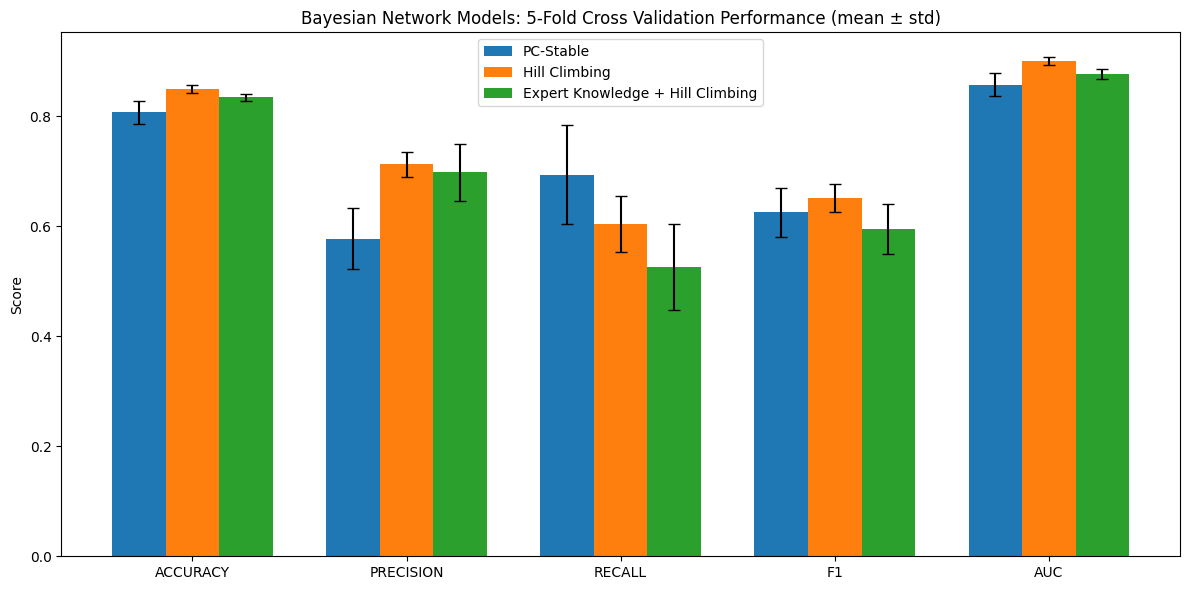

In [66]:
# Plot grouped bars for mean metrics with error bars
metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
means = {
    'PC-Stable': perf_pc.loc['mean', metrics].values,
    'Hill Climbing': perf_hc.loc['mean', metrics].values,
    # 'MMHC': perf_mm.loc['mean', metrics].values,
    'EKHC': perf_ek.loc['mean', metrics].values
}
stds = {
    'PC-Stable': perf_pc.loc['std', metrics].values,
    'Hill Climbing': perf_hc.loc['std', metrics].values,
    # 'MMHC': perf_mm.loc['std', metrics].values,
    'EKHC': perf_ek.loc['std', metrics].values
}

x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize = (12, 6))
plt.bar(x - width, means['PC-Stable'], width, yerr = stds['PC-Stable'], label = 'PC-Stable', capsize = 4)
plt.bar(x, means['Hill Climbing'], width, yerr = stds['Hill Climbing'], label = 'Hill Climbing', capsize = 4)
# plt.bar(x + width, means['MMHC'], width, yerr = stds['MMHC'], label = 'MMHC', capsize = 4)
plt.bar(x + width, means['EKHC'], width, yerr = stds['EKHC'], label = 'Expert Knowledge + Hill Climbing', capsize = 4)
plt.xticks(x, [m.upper() for m in metrics])
plt.ylabel('Score')
plt.title('Bayesian Network Models: 5-Fold Cross Validation Performance (mean ± std)')
plt.legend()
plt.tight_layout()
plt.savefig(out_dir / 'model_performance_summary.png', dpi = 150)
plt.show()